In [2]:
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2
from scripts.parsing_utils import *
from utils.utils import *
from scripts.parse_results import *

In [5]:
BASE_DIR = "/home/pari/learned-cardinalities/all_results/inl_fixed_scan_ops/nested_loop_index7/test_diff/"
#RES_DIR = BASE_DIR + "min_qerrs3"
RES_DIR2 = BASE_DIR + "final_results3"
#RES_DIR3 = BASE_DIR + "priority"
#RES_DIR3 = BASE_DIR + "flow_weight"
RES_DIR3 = BASE_DIR + "sample_bitmaps"
#RES_DIR5 = BASE_DIR + "sample_bitmaps_load"

#RES_DIR4 = BASE_DIR + "fixed_features_final_results"

RES_DIRS = []
#RES_DIRS.append(RES_DIR)
RES_DIRS.append(RES_DIR2)
RES_DIRS.append(RES_DIR3)
#RES_DIRS.append(RES_DIR5)

#RES_DIRS.append(RES_DIR4)

#ERRORS = ["qerr", "plan_pg_err", "jerr", "cm1_jerr"]
ERRORS = ["qerr", "jerr", "cm1_jerr"]


In [6]:
dfs = []
for res_dir in RES_DIRS:
    df = get_summary_df(res_dir)
    if "final_results2" in res_dir:
        df = df[df.feat_rel_pg_ests_onehot == 1]
    df["res_dir"] = str(deterministic_hash(res_dir))[0:5]
    print(set(df["partition"]))
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)

skipping  /home/pari/learned-cardinalities/all_results/inl_fixed_scan_ops/nested_loop_index7/test_diff/final_results3/diff_partitions-nested_loop_index7-mscn-df:10-nn:2:512-loss:flow_loss2-0.0--D0.1-138
skipping  /home/pari/learned-cardinalities/all_results/inl_fixed_scan_ops/nested_loop_index7/test_diff/final_results3/diff_partitions-nested_loop_index7-mscn-df:10-nn:2:512-loss:flow_loss2-0.0--D0.1-135
skipping  /home/pari/learned-cardinalities/all_results/inl_fixed_scan_ops/nested_loop_index7/test_diff/final_results3/diff_partitions-nested_loop_index7-mscn-df:10-nn:2:512-loss:mse-0.0--D0.1-985
{1, 2, 3, 4, 5}
skipping  /home/pari/learned-cardinalities/all_results/inl_fixed_scan_ops/nested_loop_index7/test_diff/sample_bitmaps/diff_partitions-nested_loop_index7-mscn-df:10-nn:2:512-loss:mse-0.0--D0.1-949
skipping  /home/pari/learned-cardinalities/all_results/inl_fixed_scan_ops/nested_loop_index7/test_diff/sample_bitmaps/diff_partitions-nested_loop_index7-mscn-df:10-nn:2:256-loss:mse-0.0-

In [4]:
def get_alg_name(cols, x):
    name = ""
    for col in cols:
        if col == "sample_bitmap":
            #if not x["sample_bitmap"].isnull():
            if not pd.isnull(x["sample_bitmap"]):   
                name += "_bitmap"
        else:
            name += x[col]
    return name

df = df[df["template"] == "all"]
df = df[df["test_diff_templates"] == 1]

#df = df[df["num_tables"] == "all"]

#cols = ["loss_func", "min_qerr", "weight_decay"]
#cols = ["res_dir", "loss_func", "sample_bitmap"]
cols = ["loss_func", "sample_bitmap"]


df = df[df["alg"] != "true"]
df = df[df["alg"] != "postgres"]

#df['alg_name'] = df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
df['alg_name'] = df[cols].apply(lambda row: get_alg_name(cols, row), axis=1)


df_median = df[df["summary_type"] == "percentile:50"]
df = df[df["summary_type"] == "mean"]

In [5]:
print(set(df.alg_name))

{'mse', 'mse_bitmap', 'flow_loss2', 'flow_loss2_bitmap'}


In [6]:
COLORS = ["blue", "green", "orange", "red", "black", "violet", "lightblue", "gray"]
HUE_COLORS = {}
#ORDER = ["flow_loss2_nan", "mse_nan", "mse_1.5", "mse_2.5", "mse_5.0", "mse_10.0", "mse_20.0", "mse_100.0"]
#ORDER = ["flow_loss2_nan", "mse_nan", "mse_2.5", "mse_5.0", "mse_10.0", "mse_25.0", "mse_100.0"]

## ORDER with min_qerr, and weight decay runs
#ORDER = ["flow_loss2_nan_0.1", "mse_nan_0.1", "mse_1.0_1.0", "mse_1.0_2.0", "mse_1.0_10.0", "mse_2.5_0.1", "mse_5.0_0.1", 
#        "mse_10.0_0.1", "mse_20.0_0.1", "mse_100.0_0.1"]

ORDER = ["mse", "mse_bitmap", "flow_loss2_bitmap", "flow_loss2"]
#ORDER = None
HUE_ORDER = ORDER
for i,alg in enumerate(ORDER):
    HUE_COLORS[alg] = COLORS[i]

# Naming Scheme
## loss_bitmap

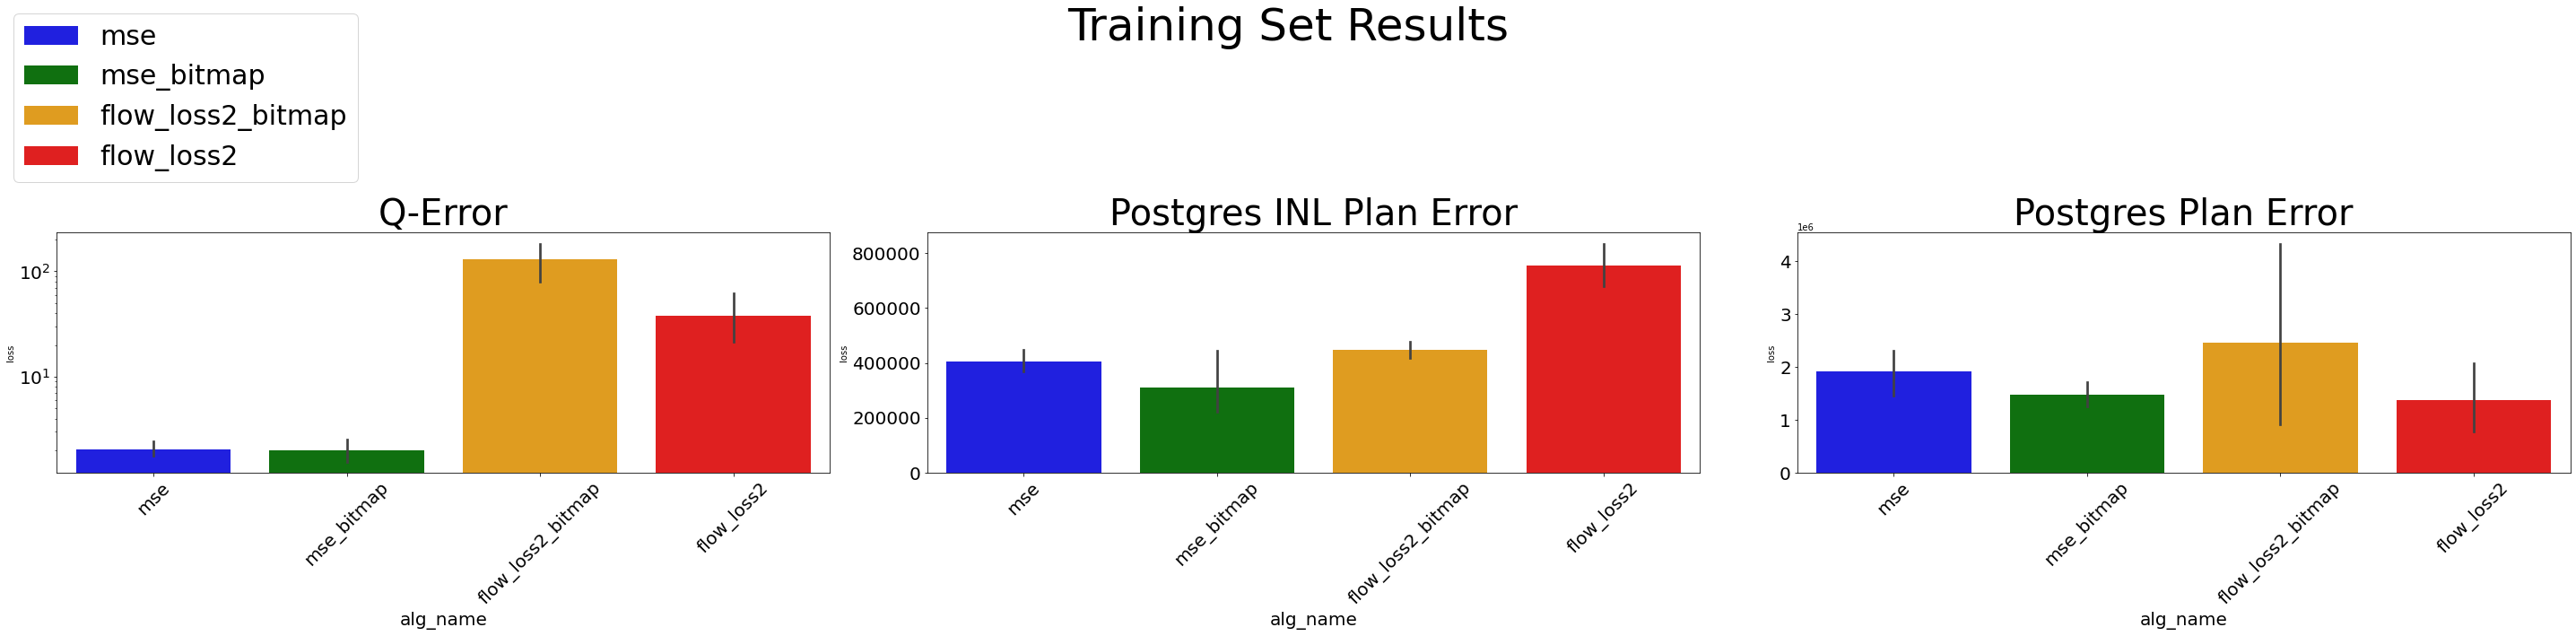

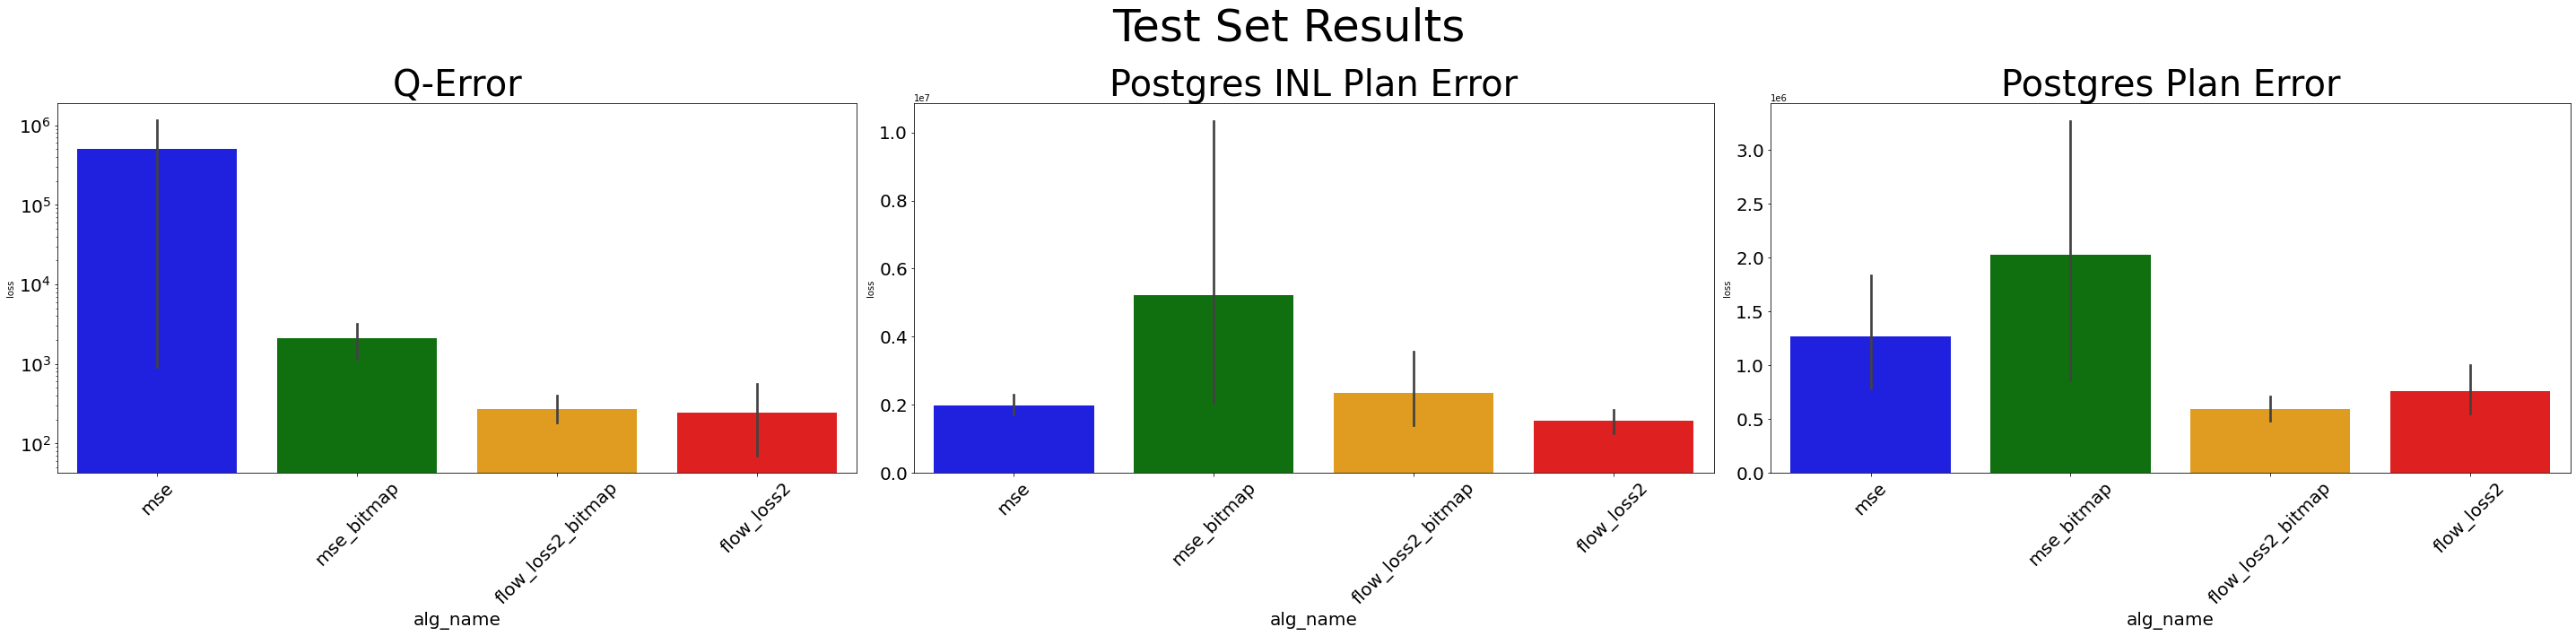

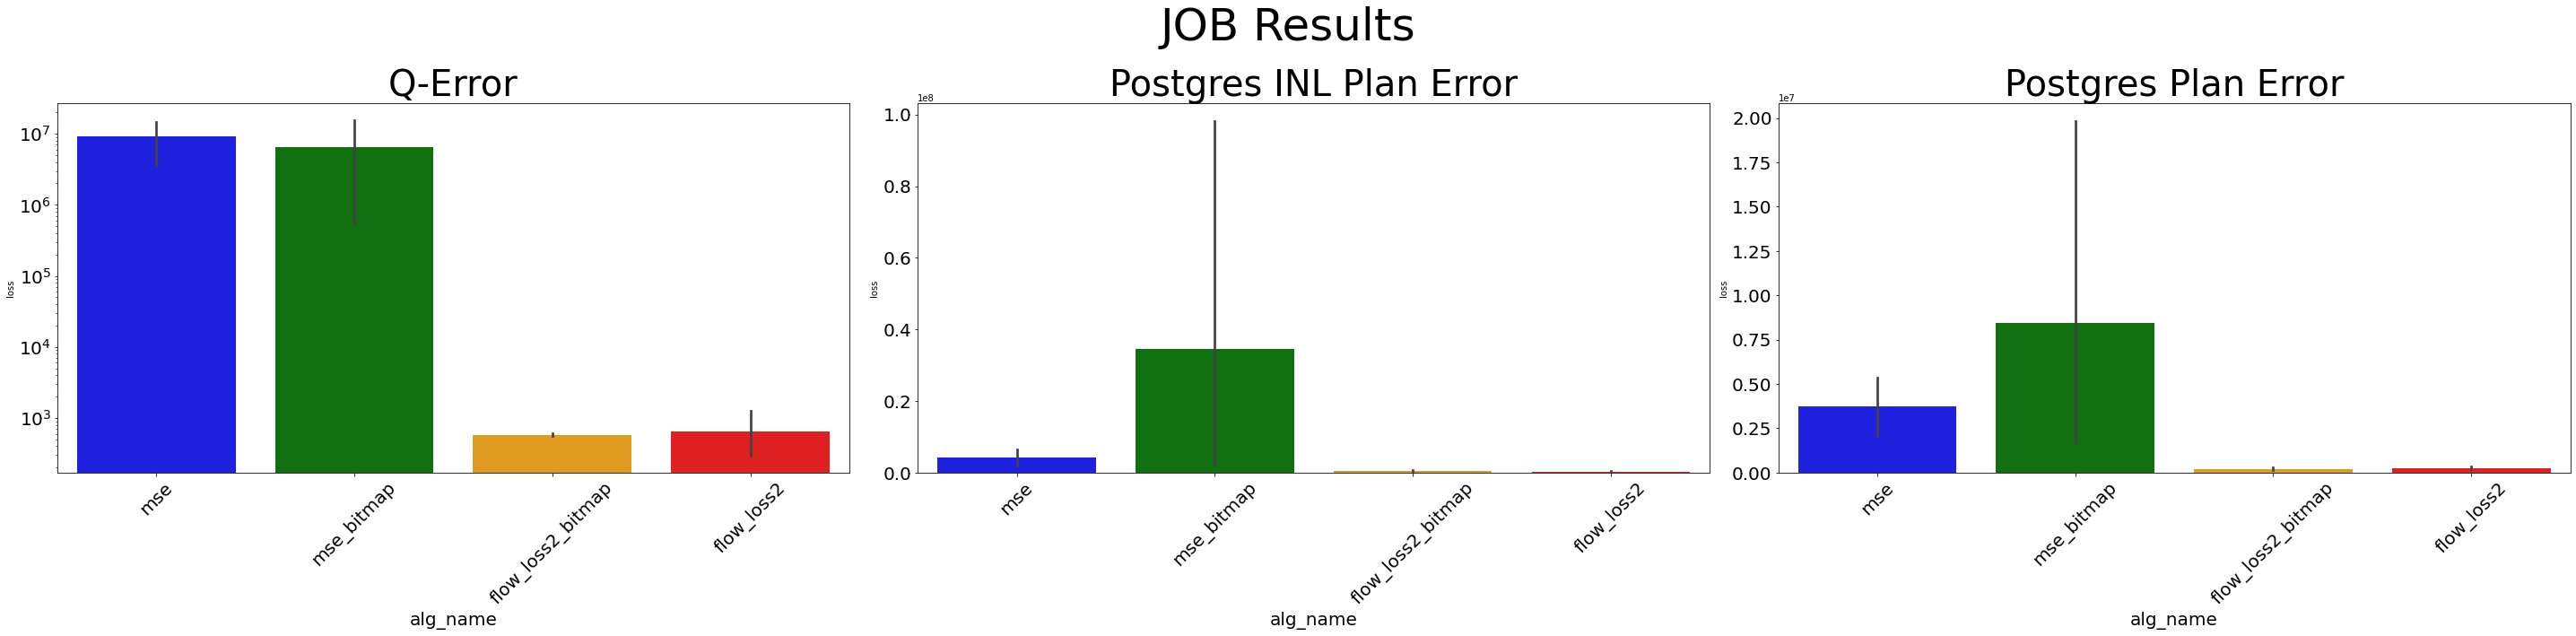

In [9]:
construct_summary_final(df, "train", "Training Set Results", ERRORS, HUE_COLORS=HUE_COLORS, ORDER=ORDER, 
                        HUE_ORDER=HUE_ORDER)
construct_summary_final(df, "test", "Test Set Results", ERRORS, HUE_COLORS=HUE_COLORS, ORDER=ORDER, 
                        HUE_ORDER=HUE_ORDER)
construct_summary_final(df, "job", "JOB Results", ERRORS, HUE_COLORS=HUE_COLORS, ORDER=ORDER, 
                        HUE_ORDER=HUE_ORDER)

# Medians

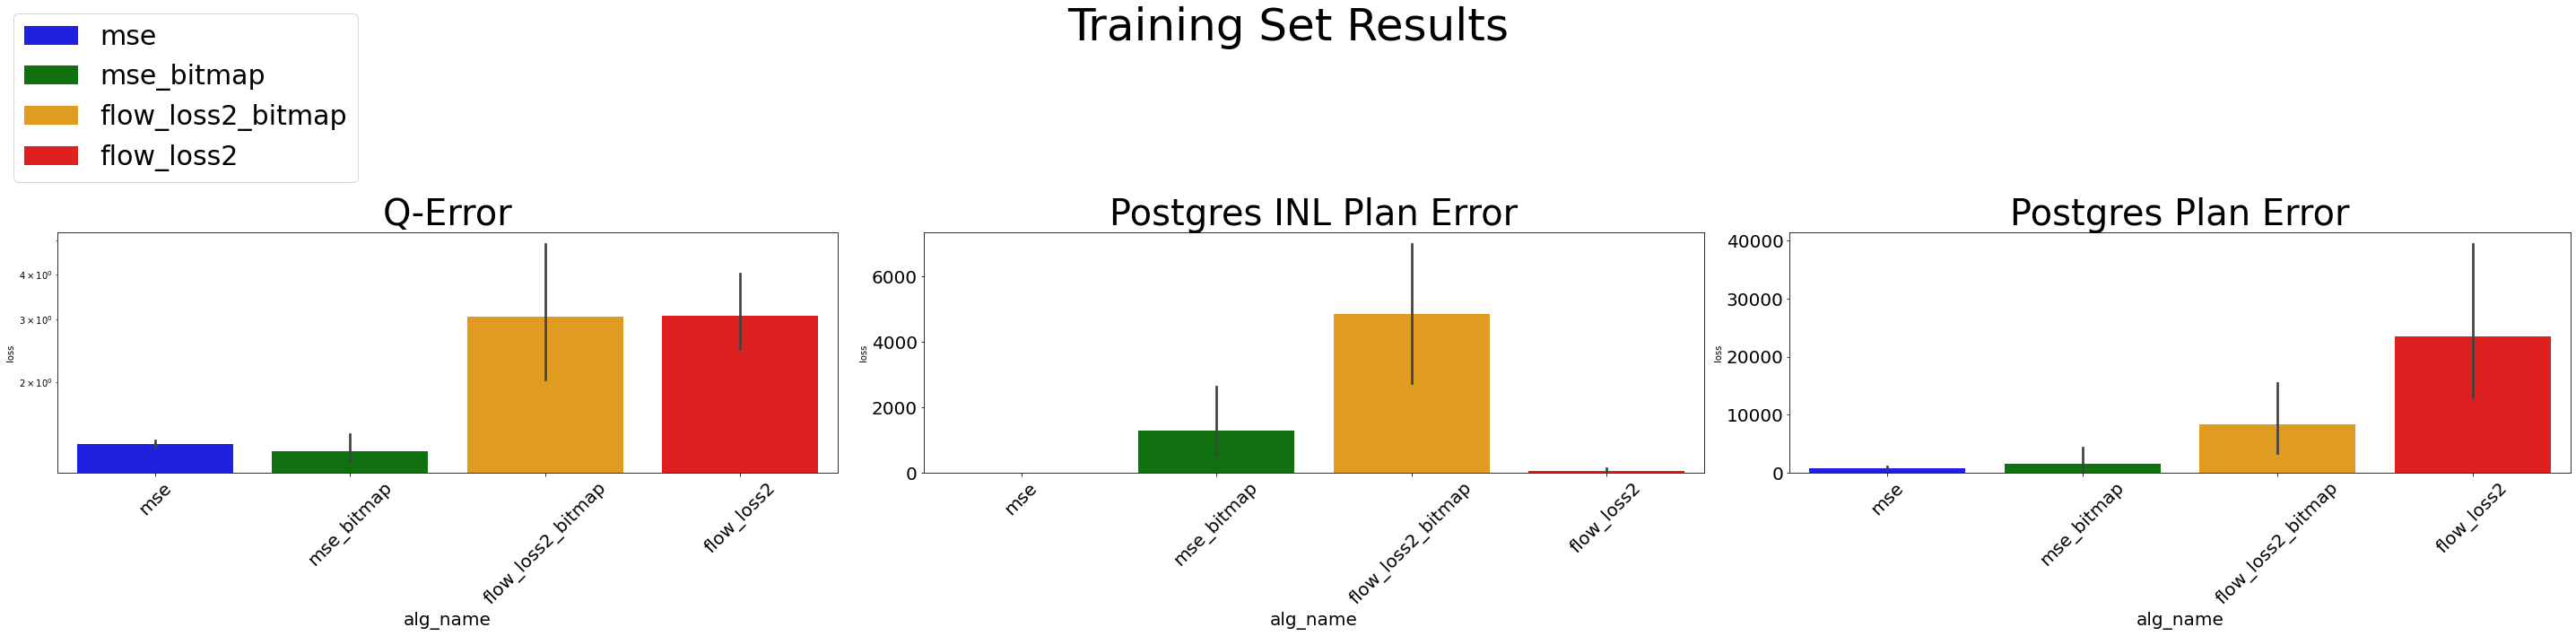

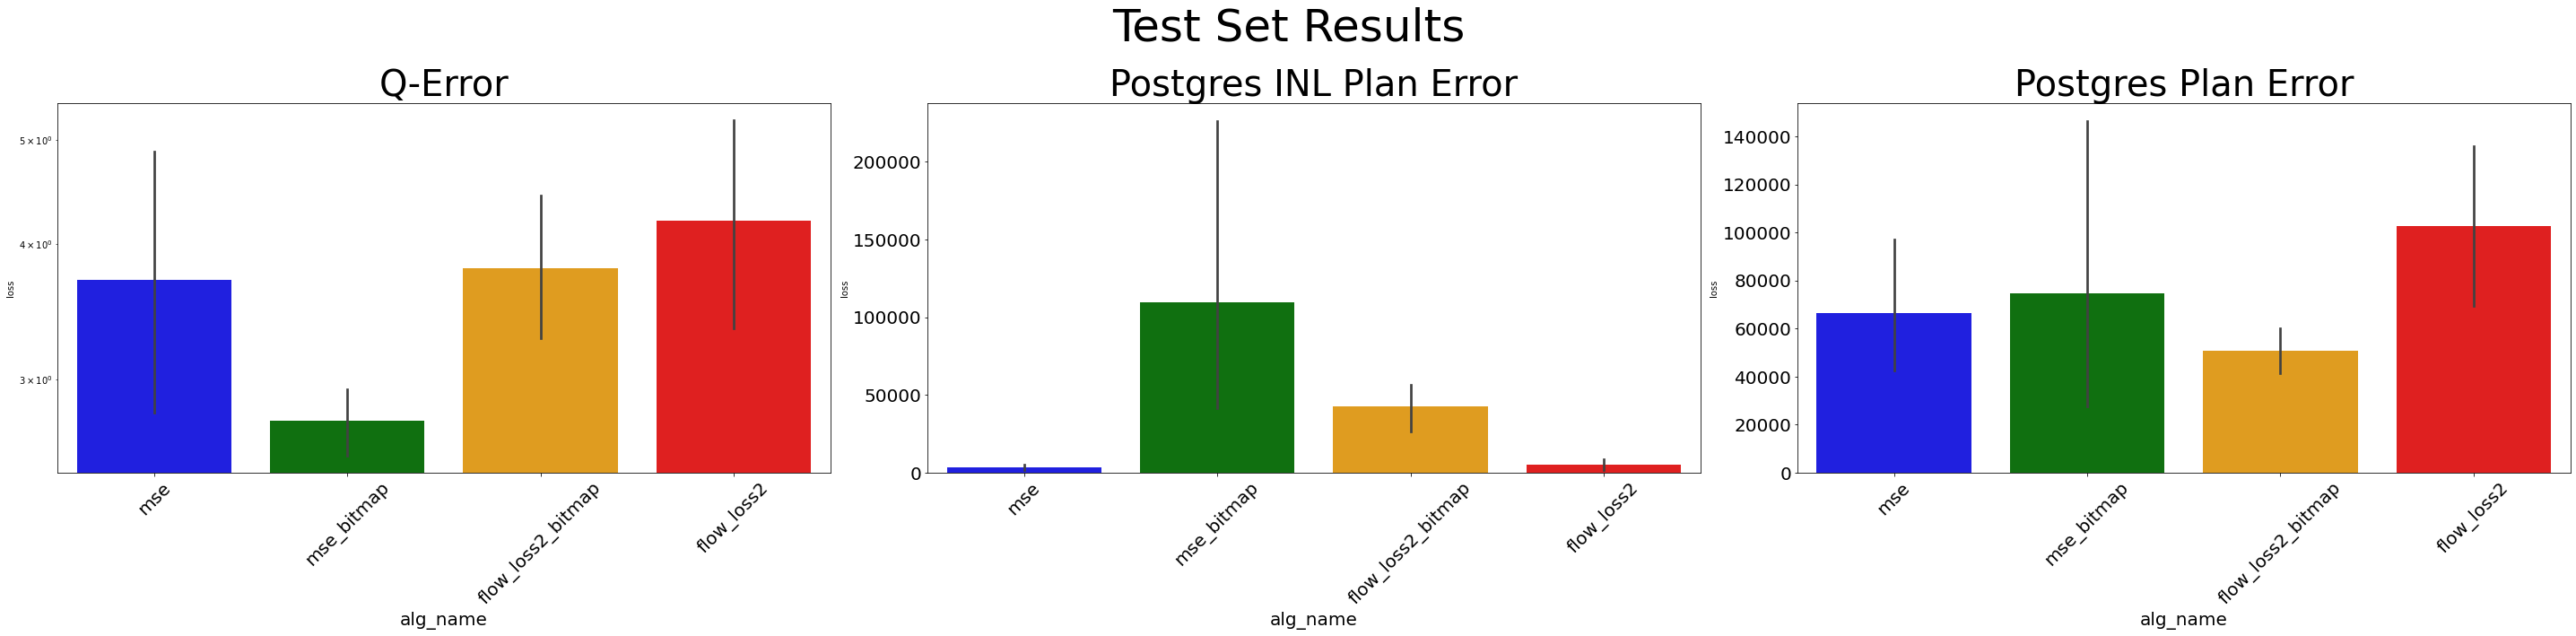

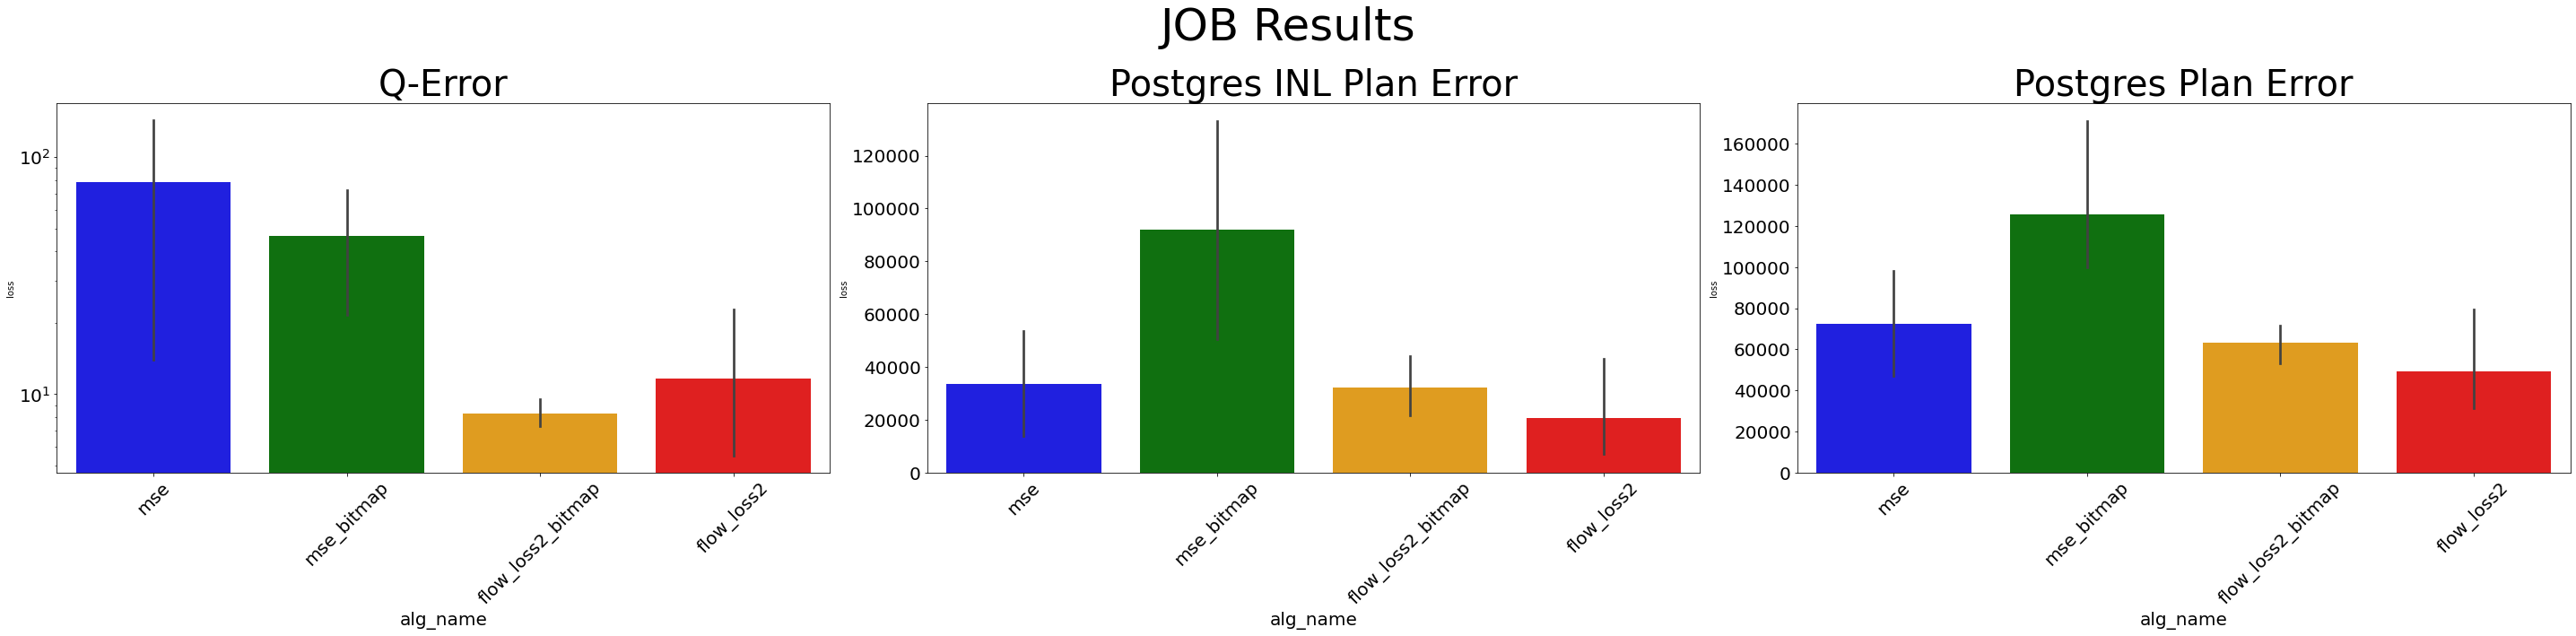

In [10]:
construct_summary_final(df_median, "train", "Training Set Results", ERRORS, HUE_COLORS=HUE_COLORS, ORDER=ORDER, 
                        HUE_ORDER=HUE_ORDER)
construct_summary_final(df_median, "test", "Test Set Results", ERRORS, HUE_COLORS=HUE_COLORS, ORDER=ORDER, 
                        HUE_ORDER=HUE_ORDER)
construct_summary_final(df_median, "job", "JOB Results", ERRORS, HUE_COLORS=HUE_COLORS, ORDER=ORDER, 
                        HUE_ORDER=HUE_ORDER)

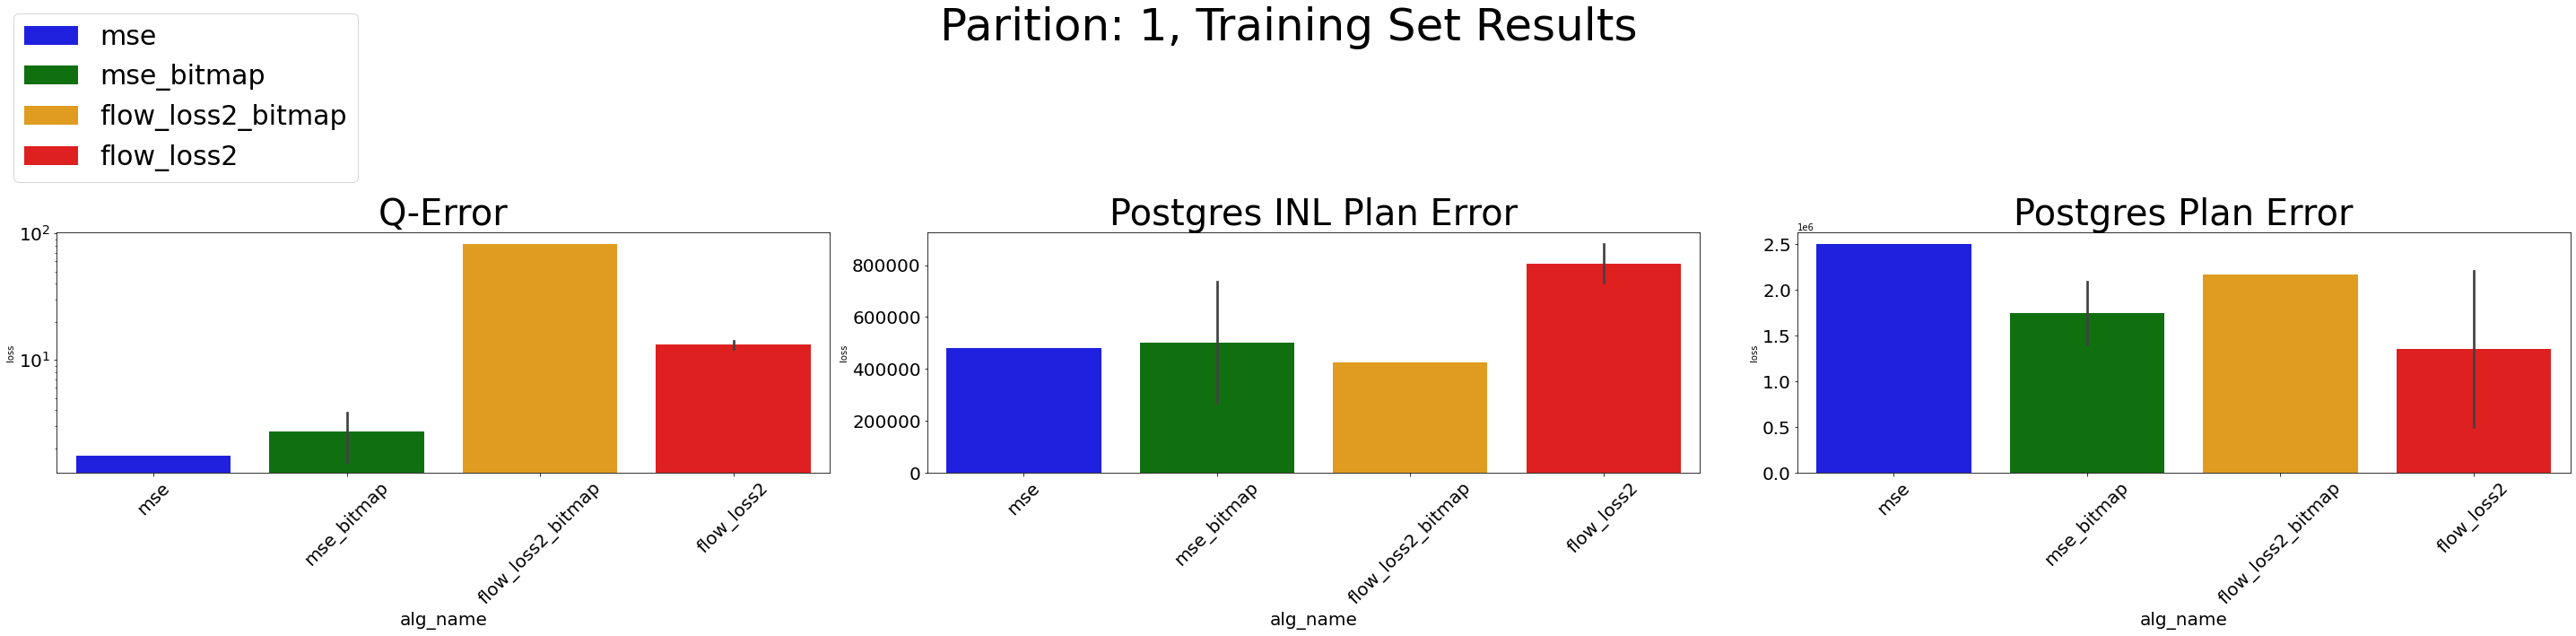

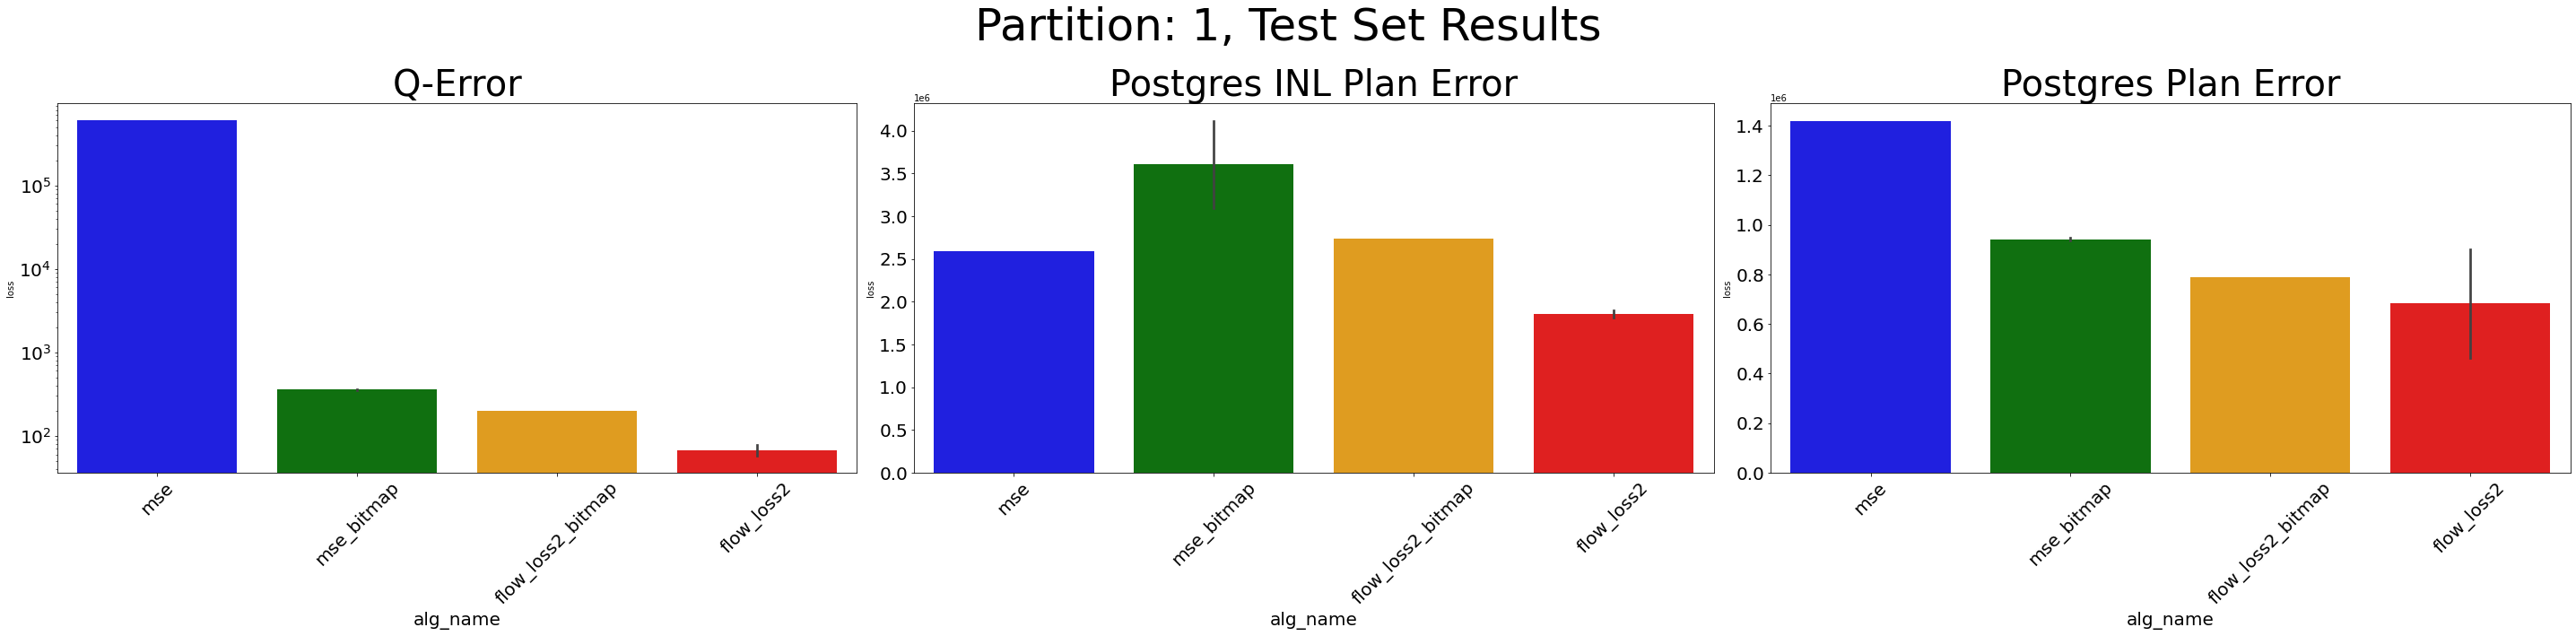

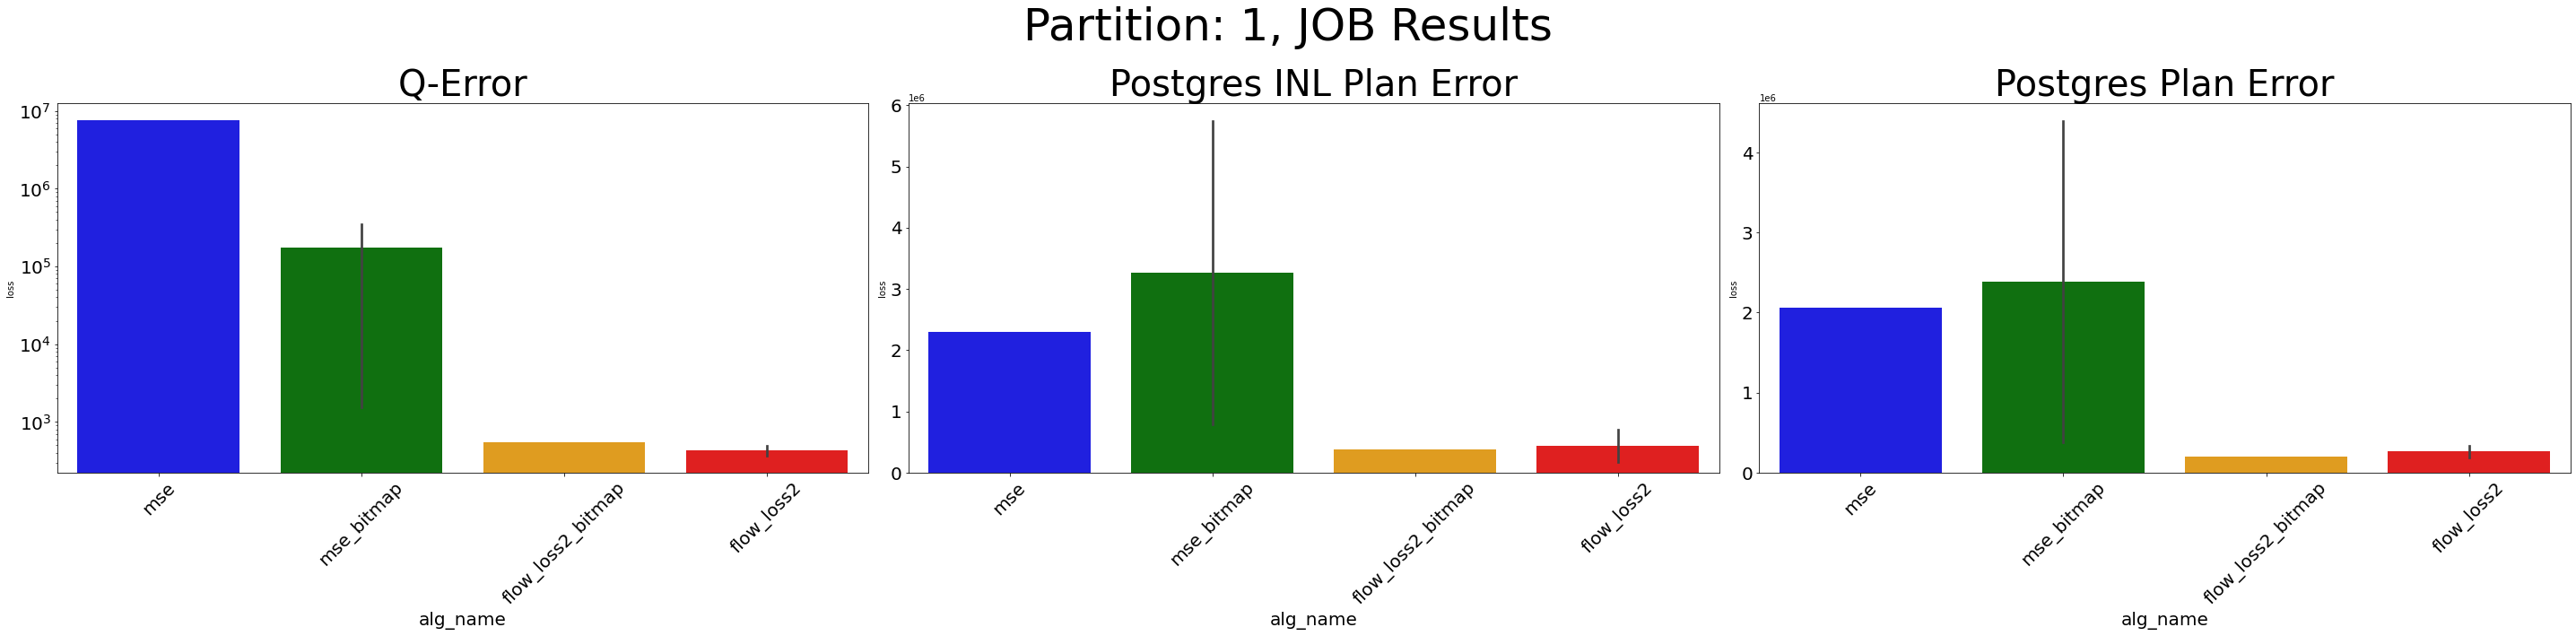

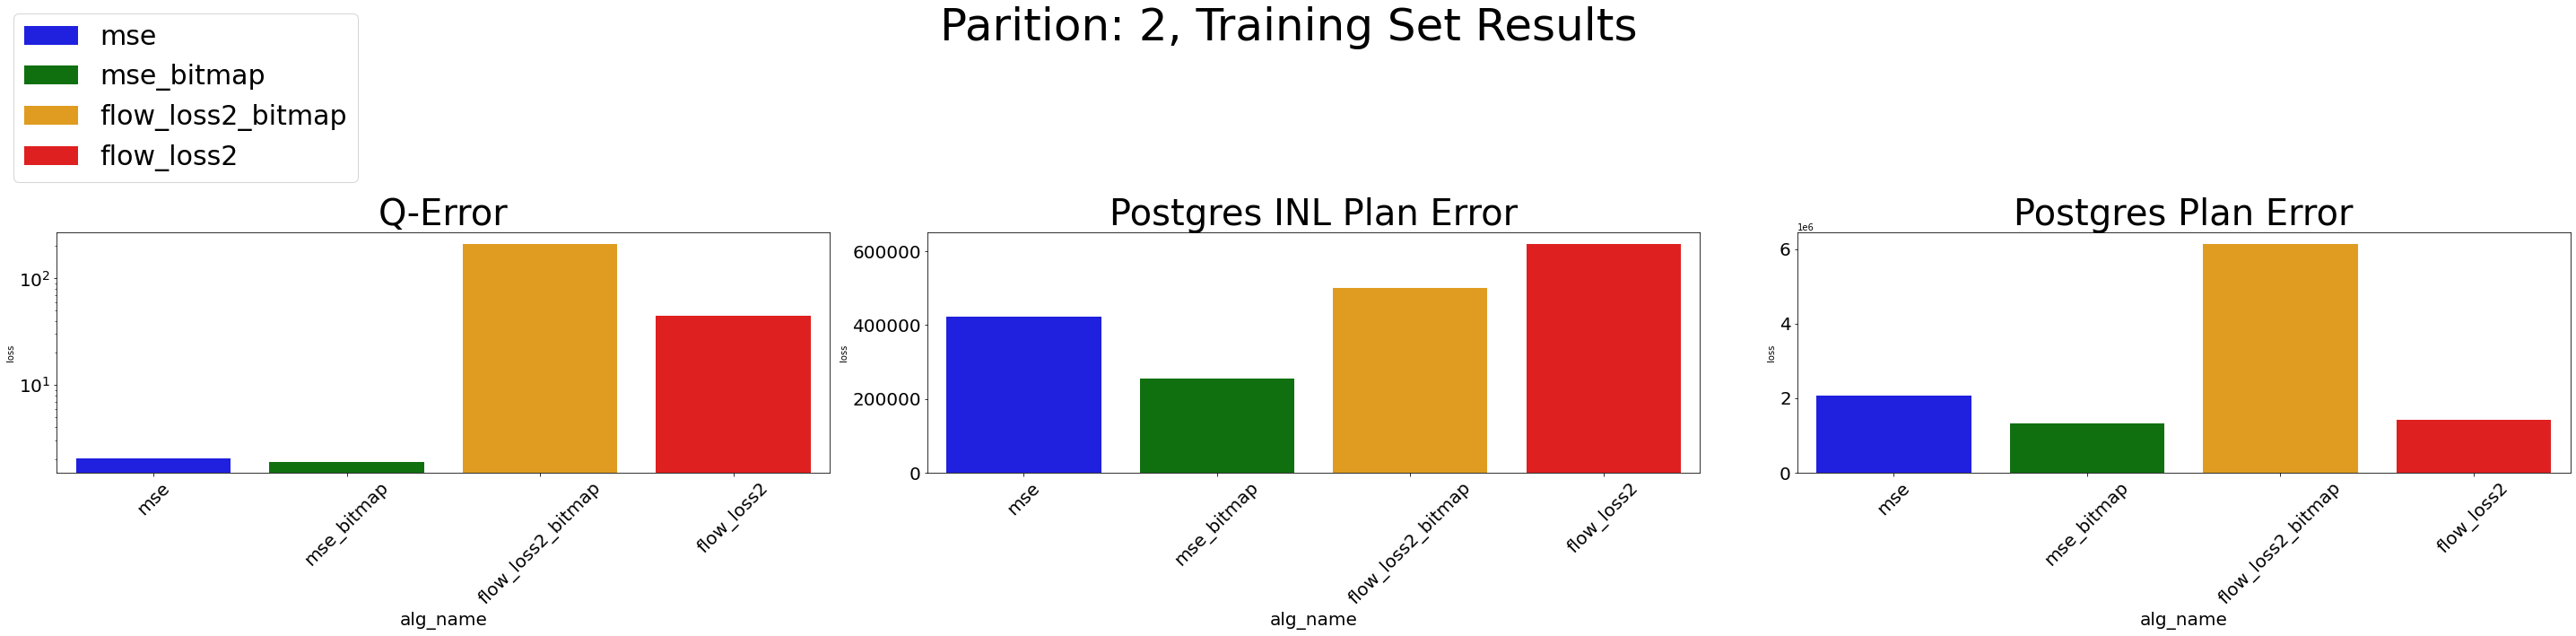

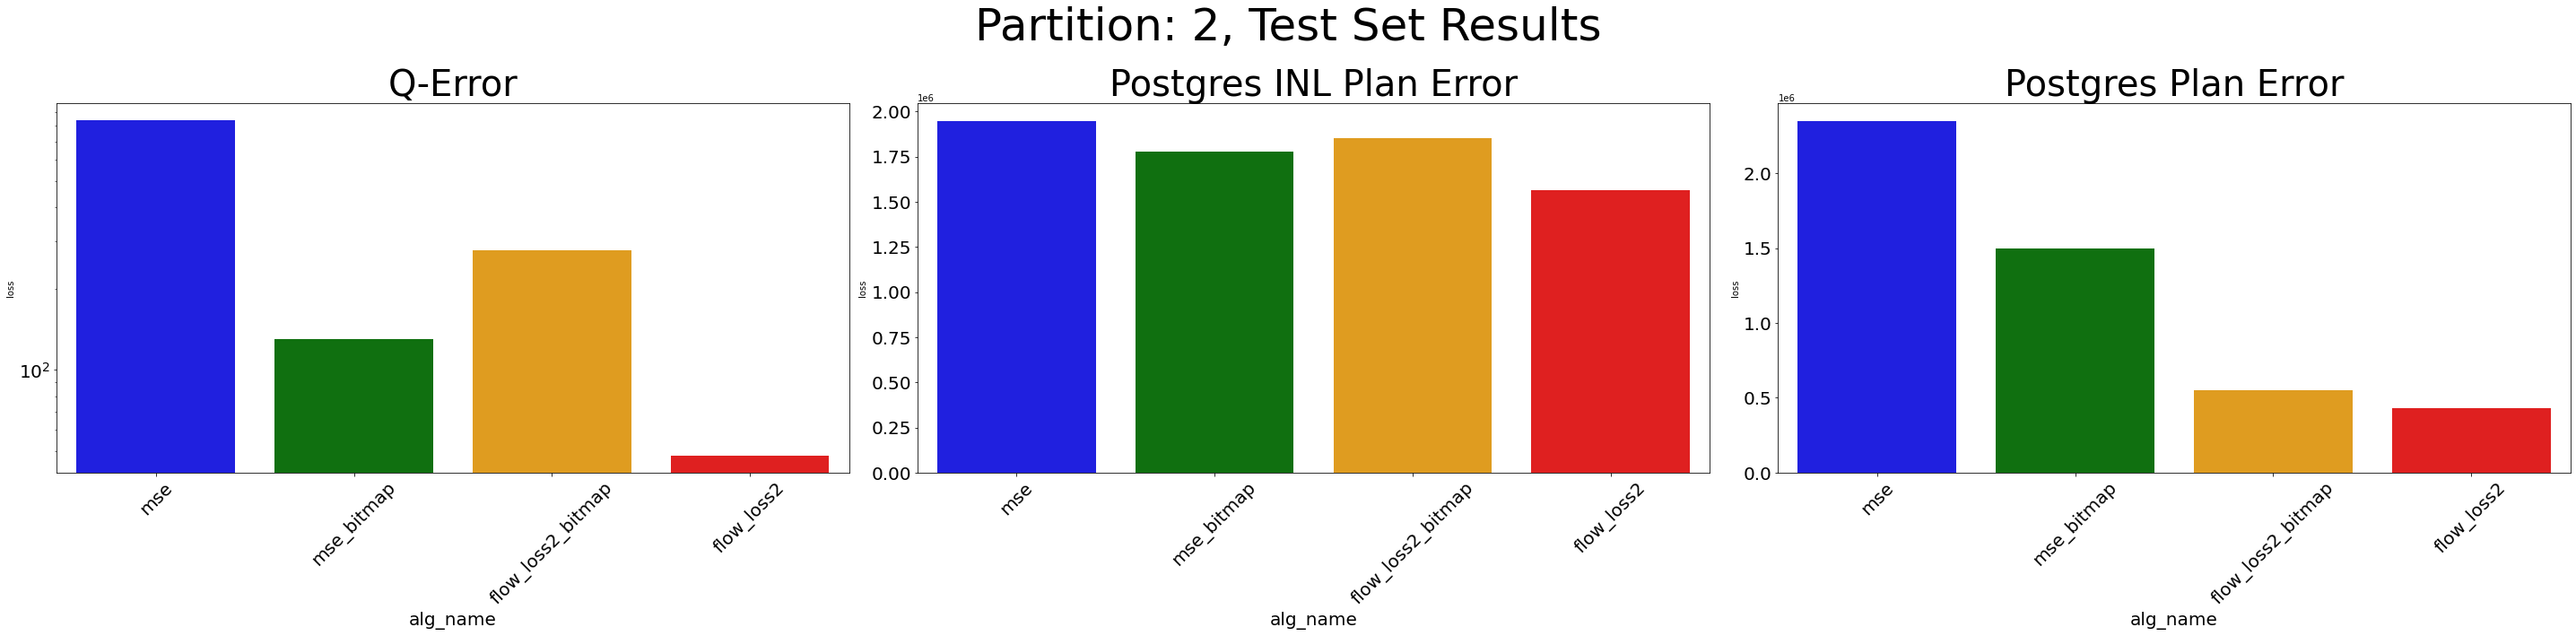

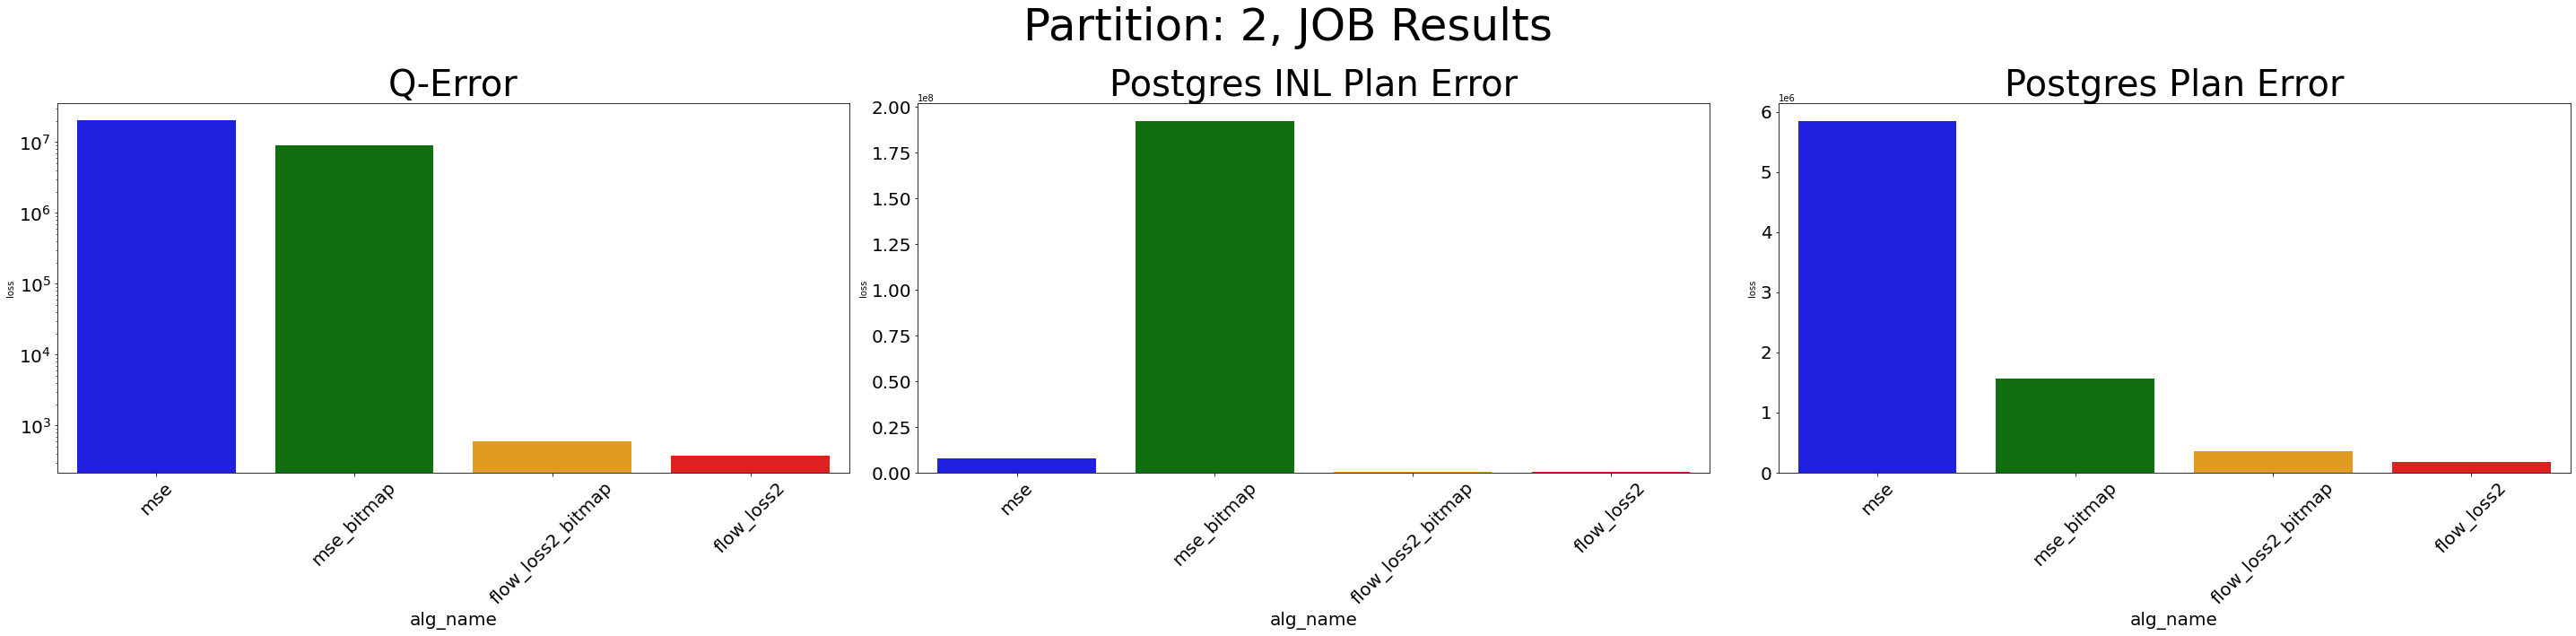

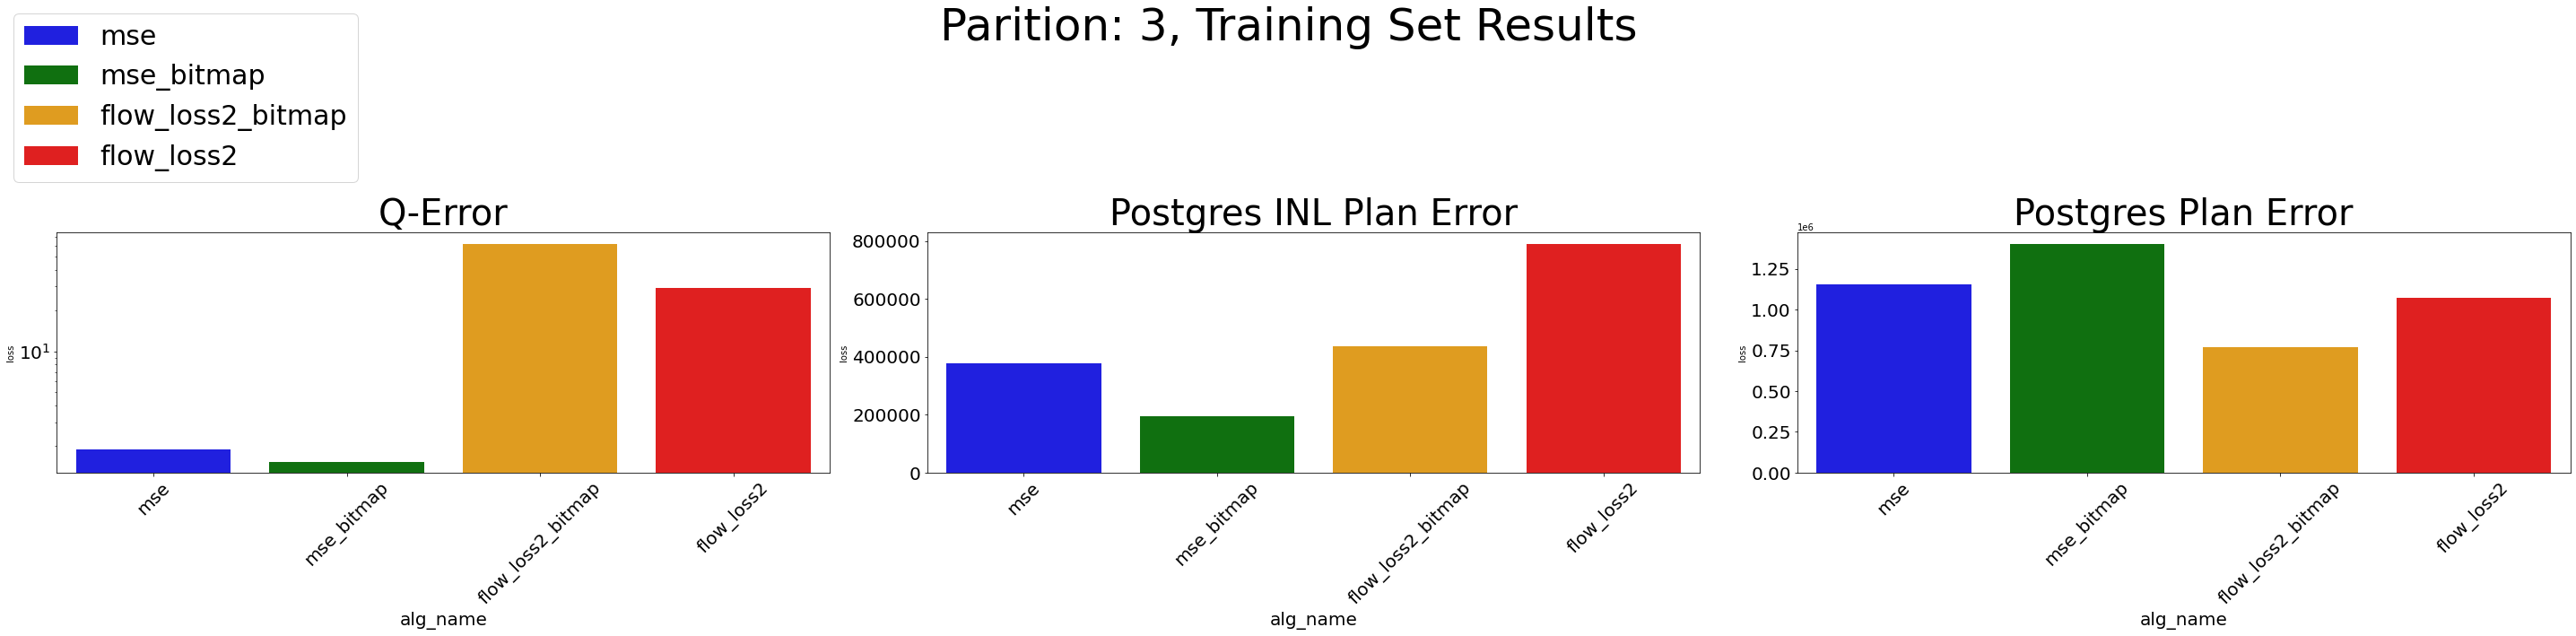

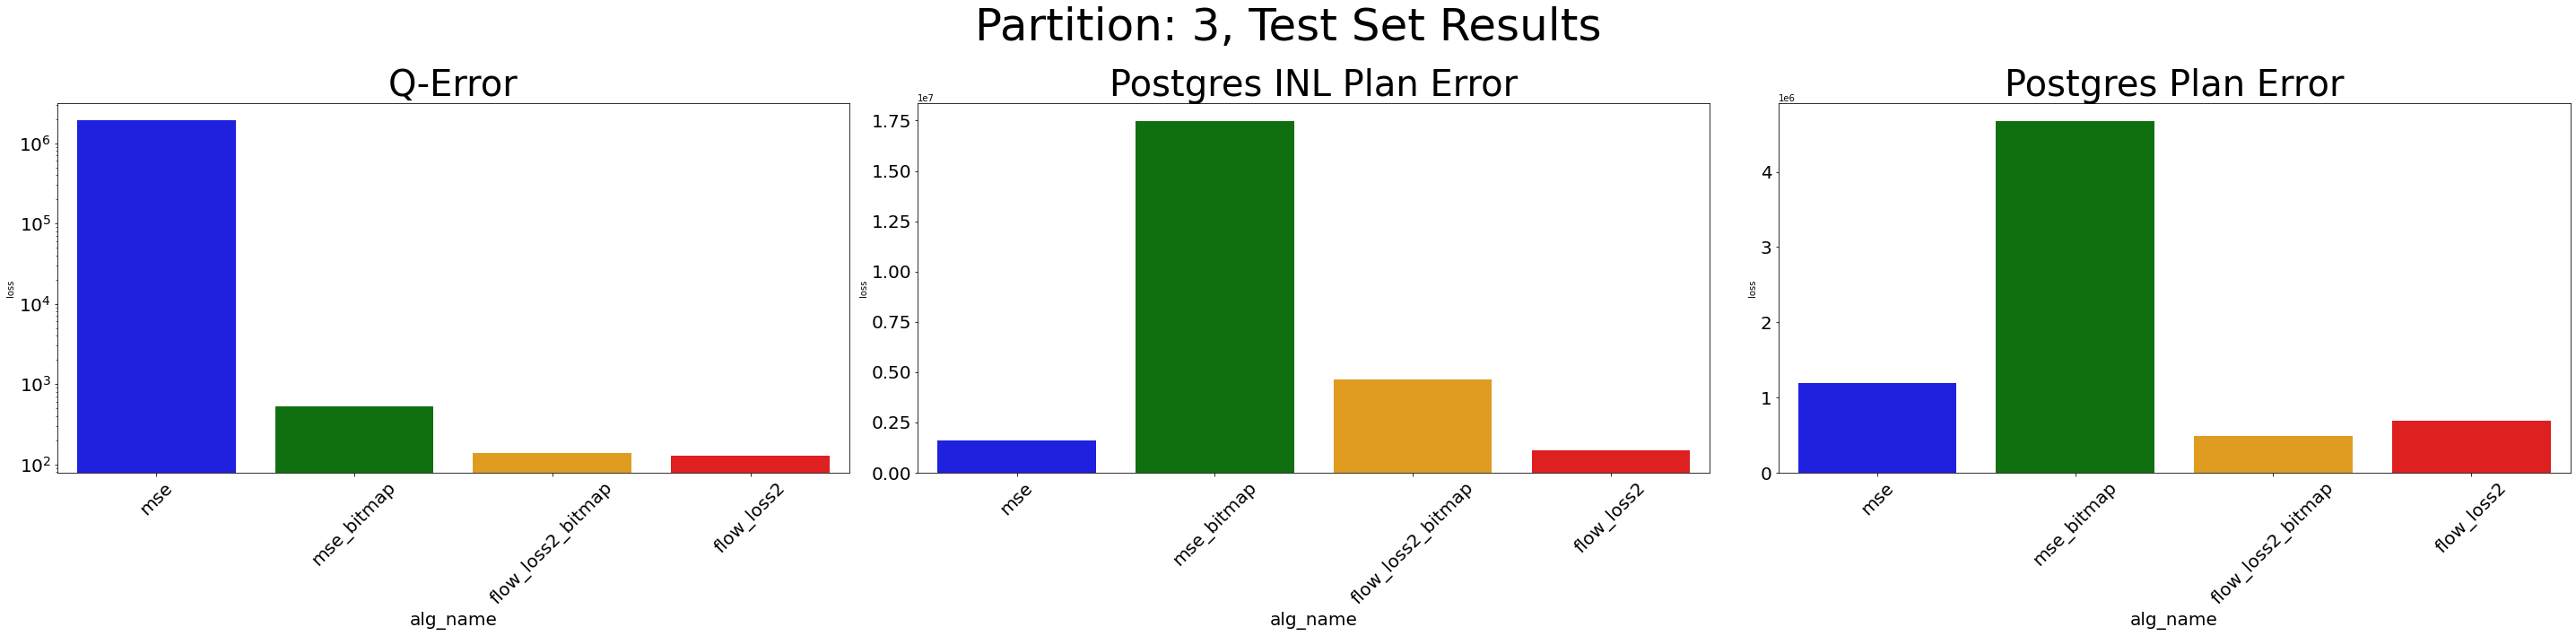

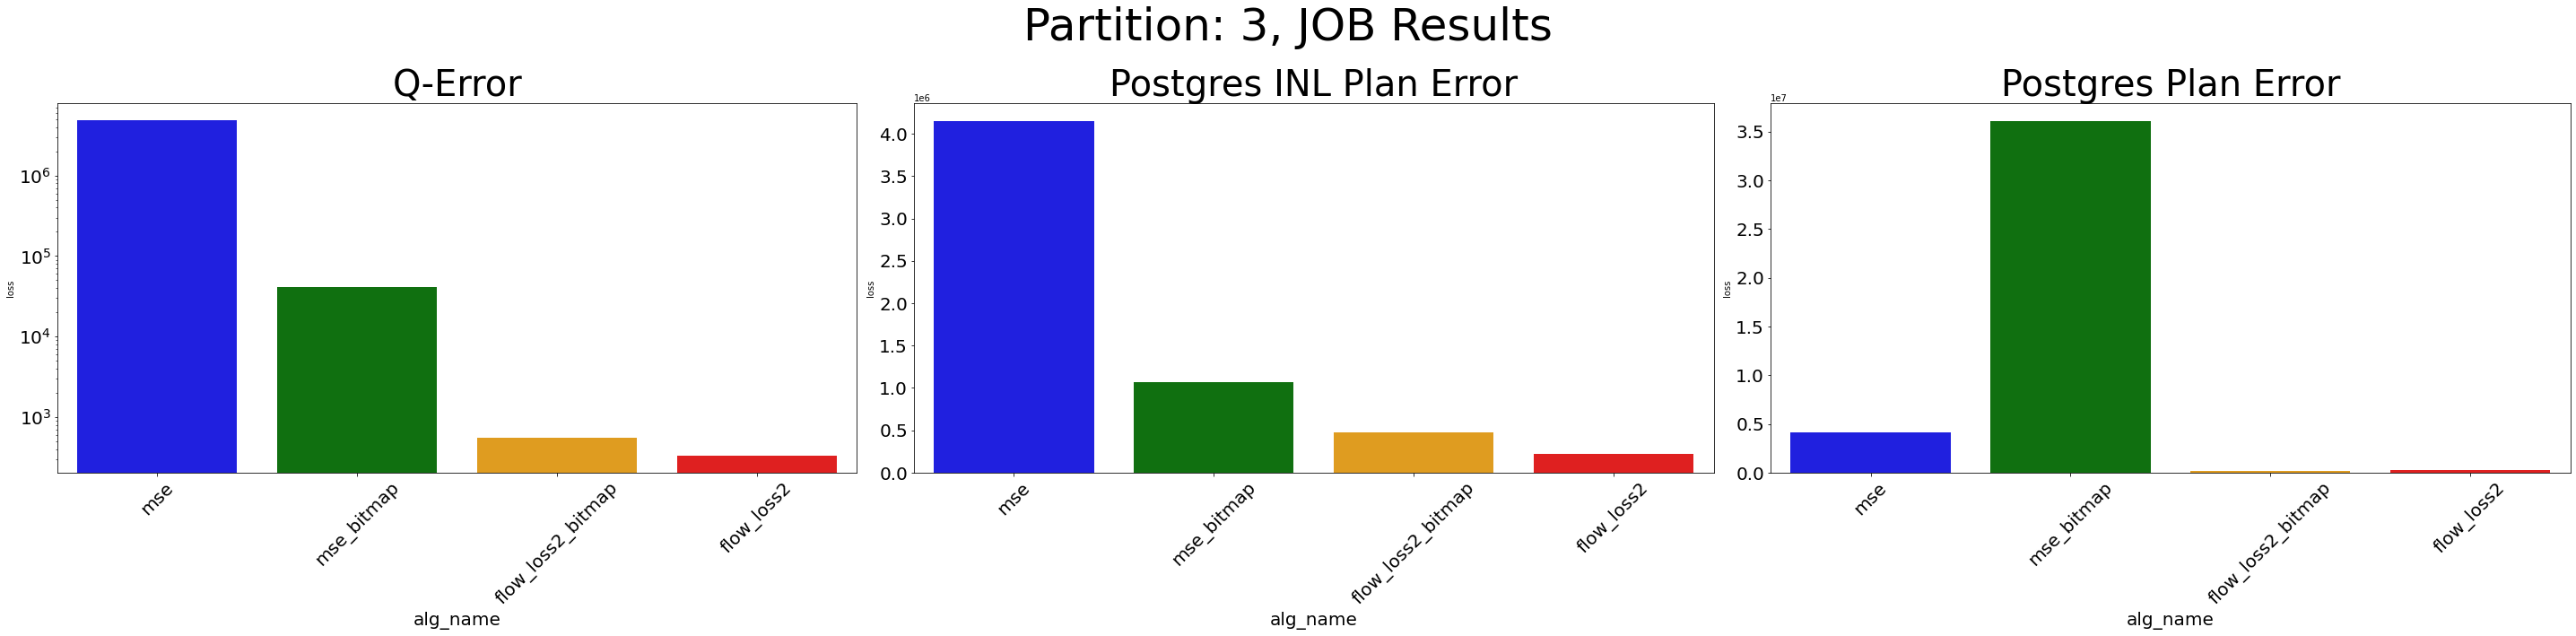

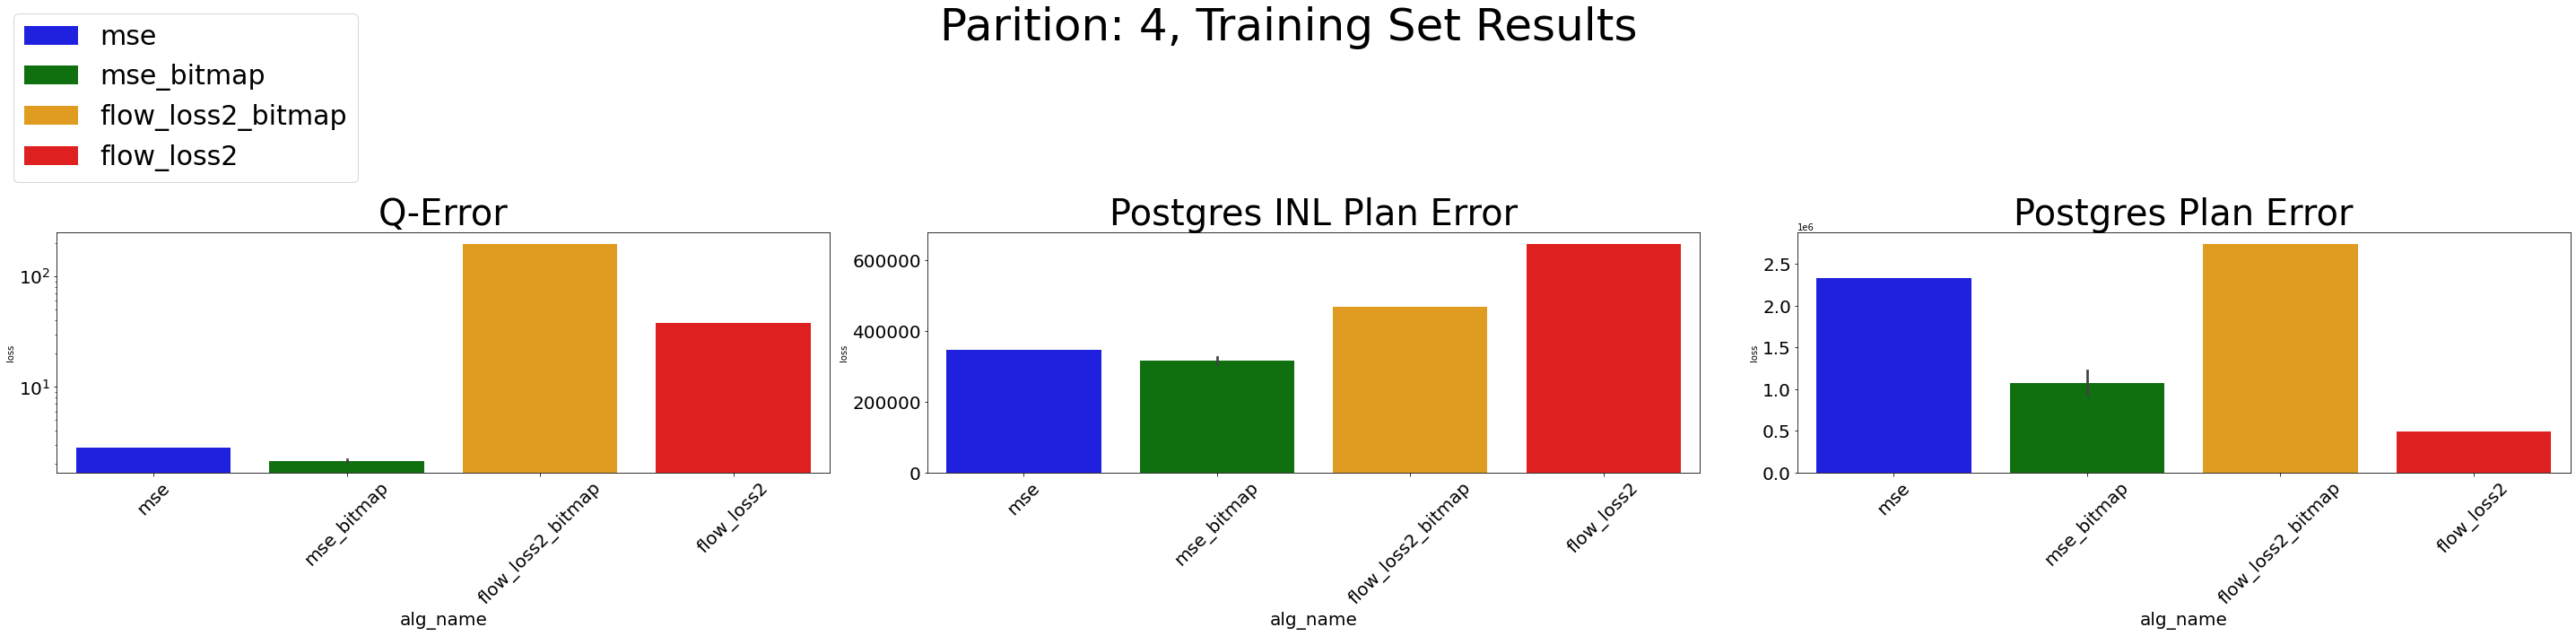

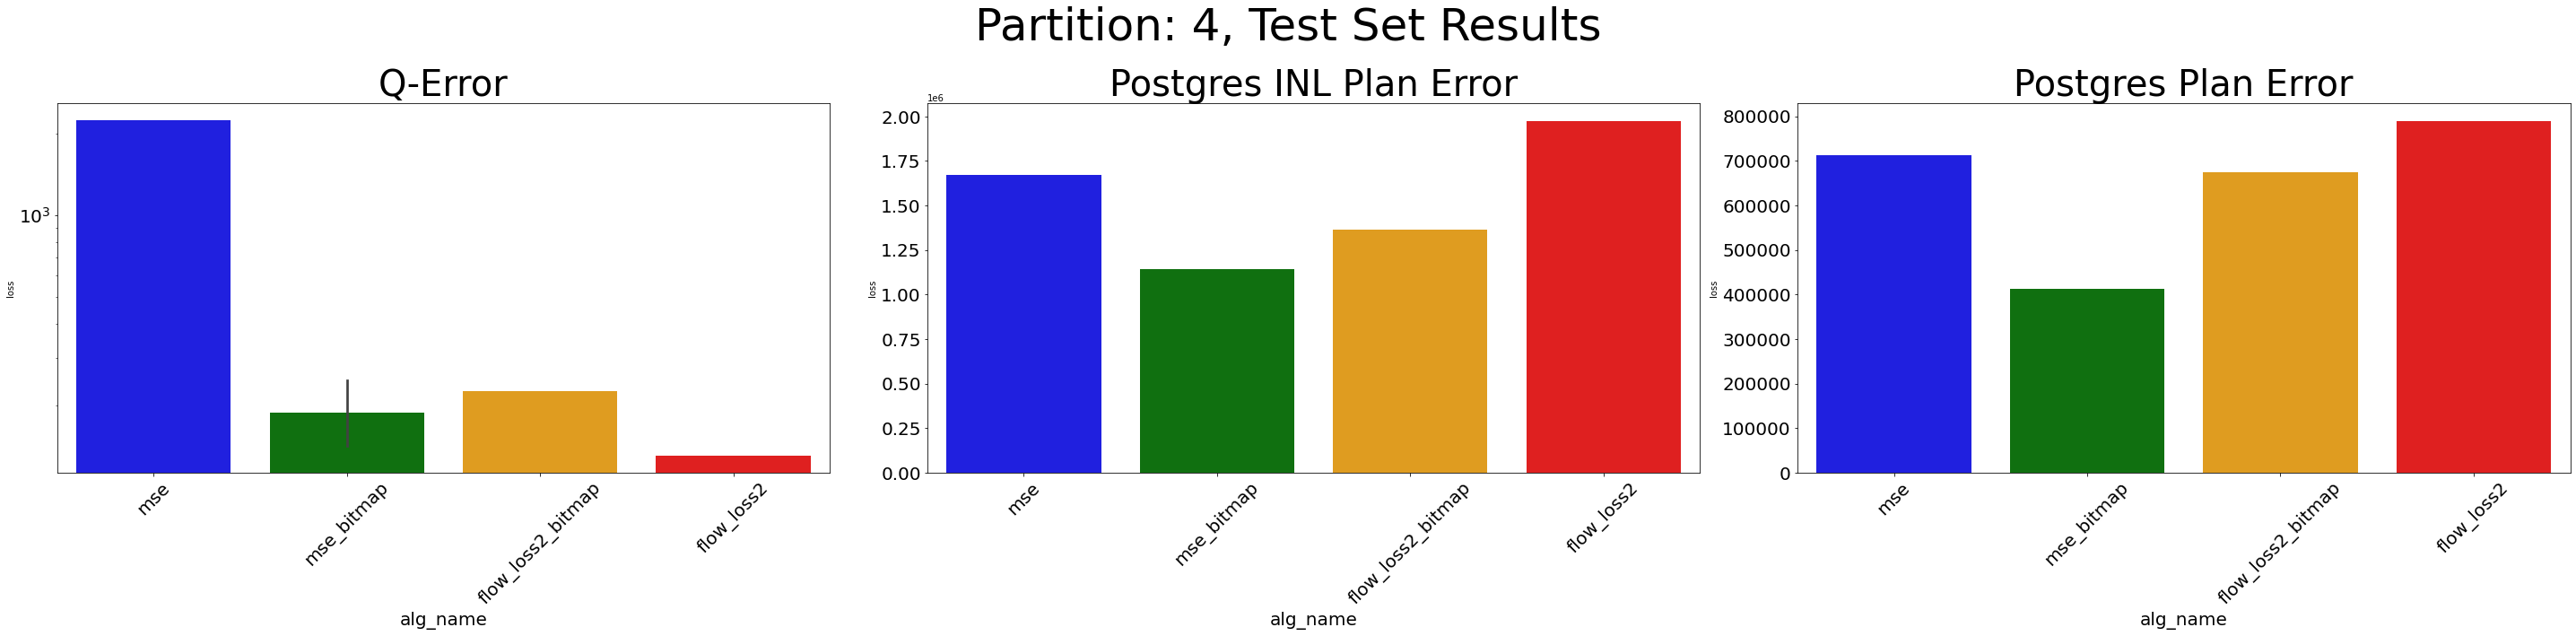

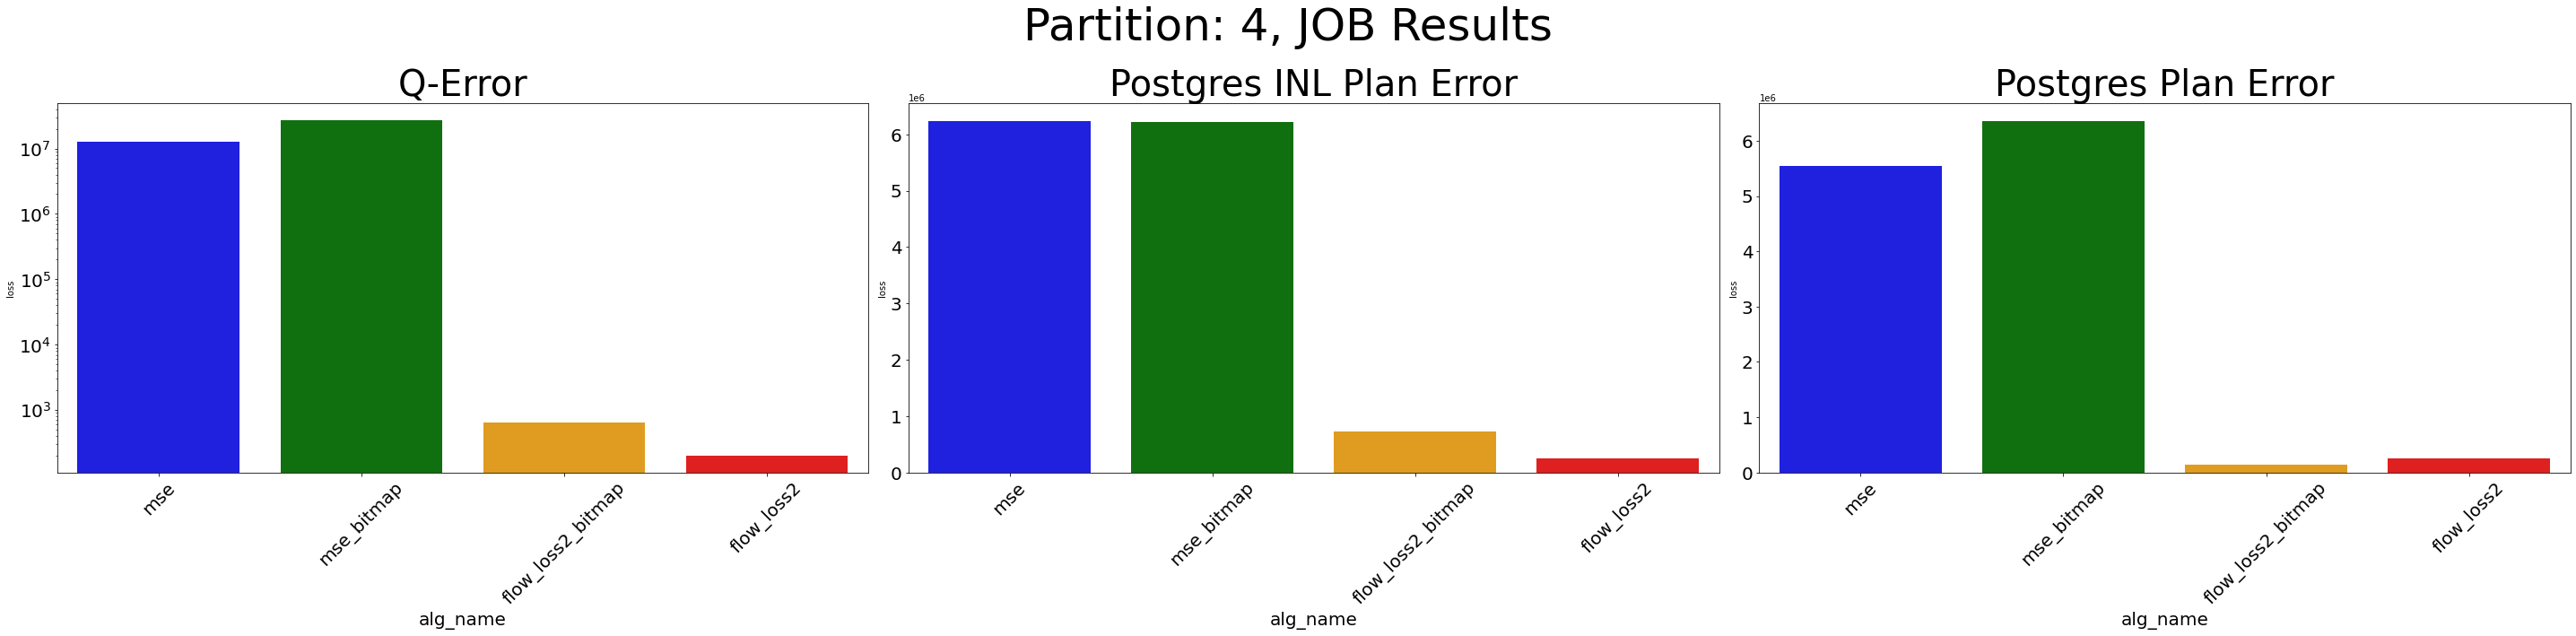

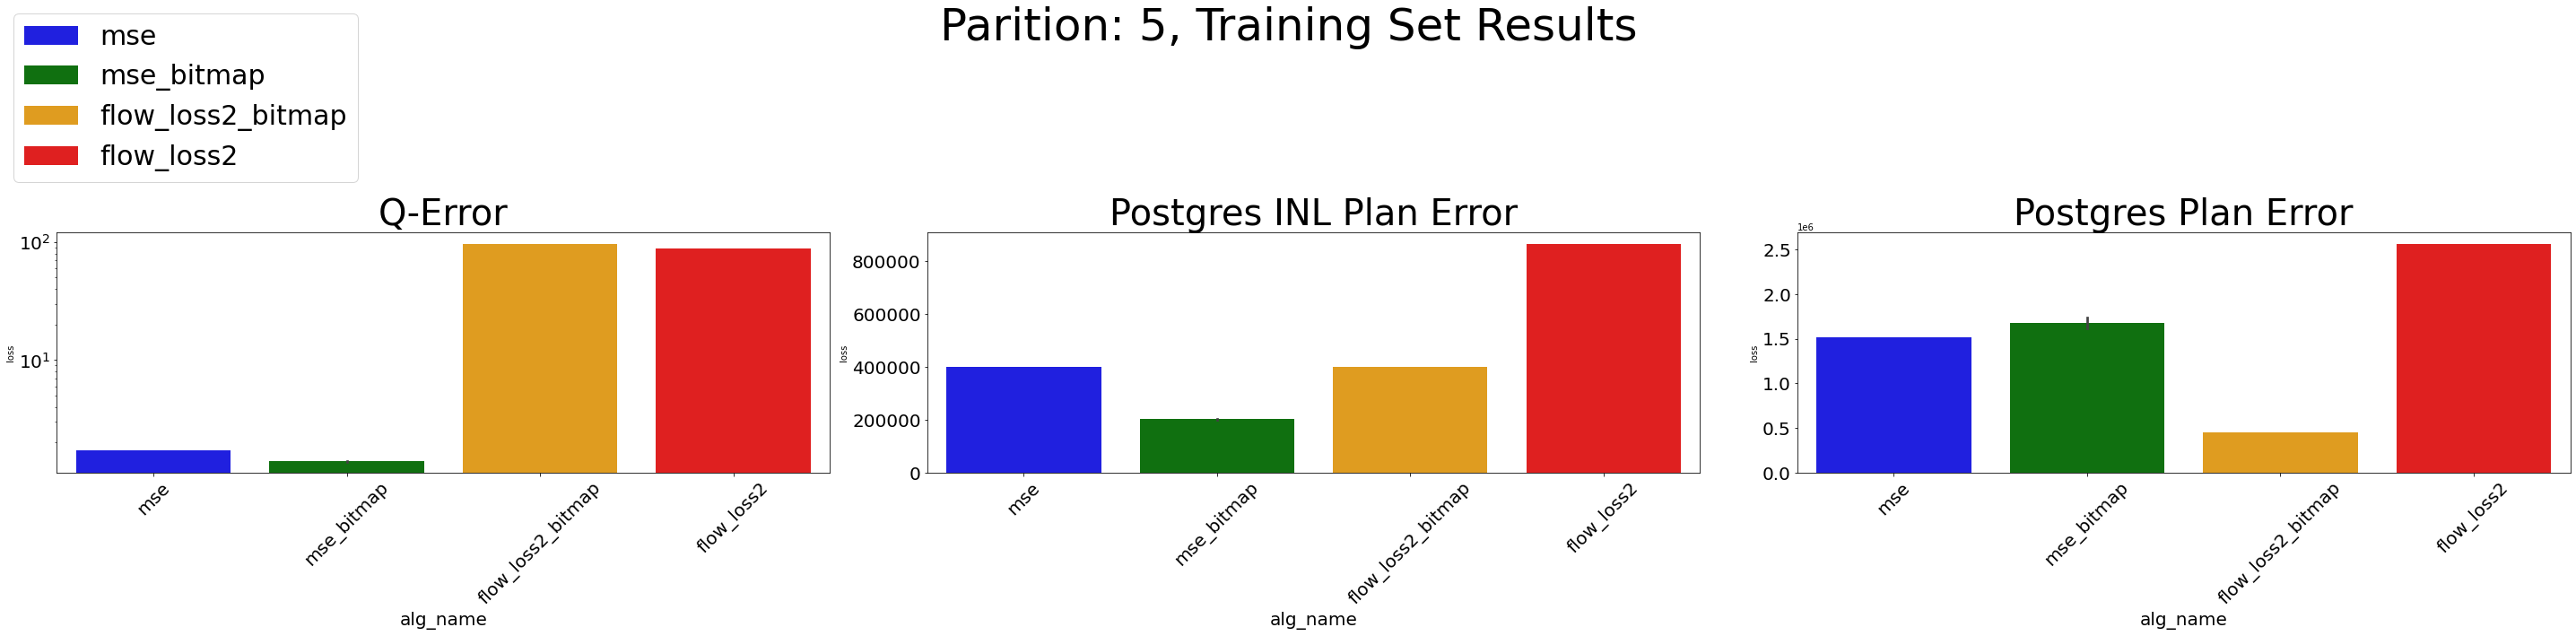

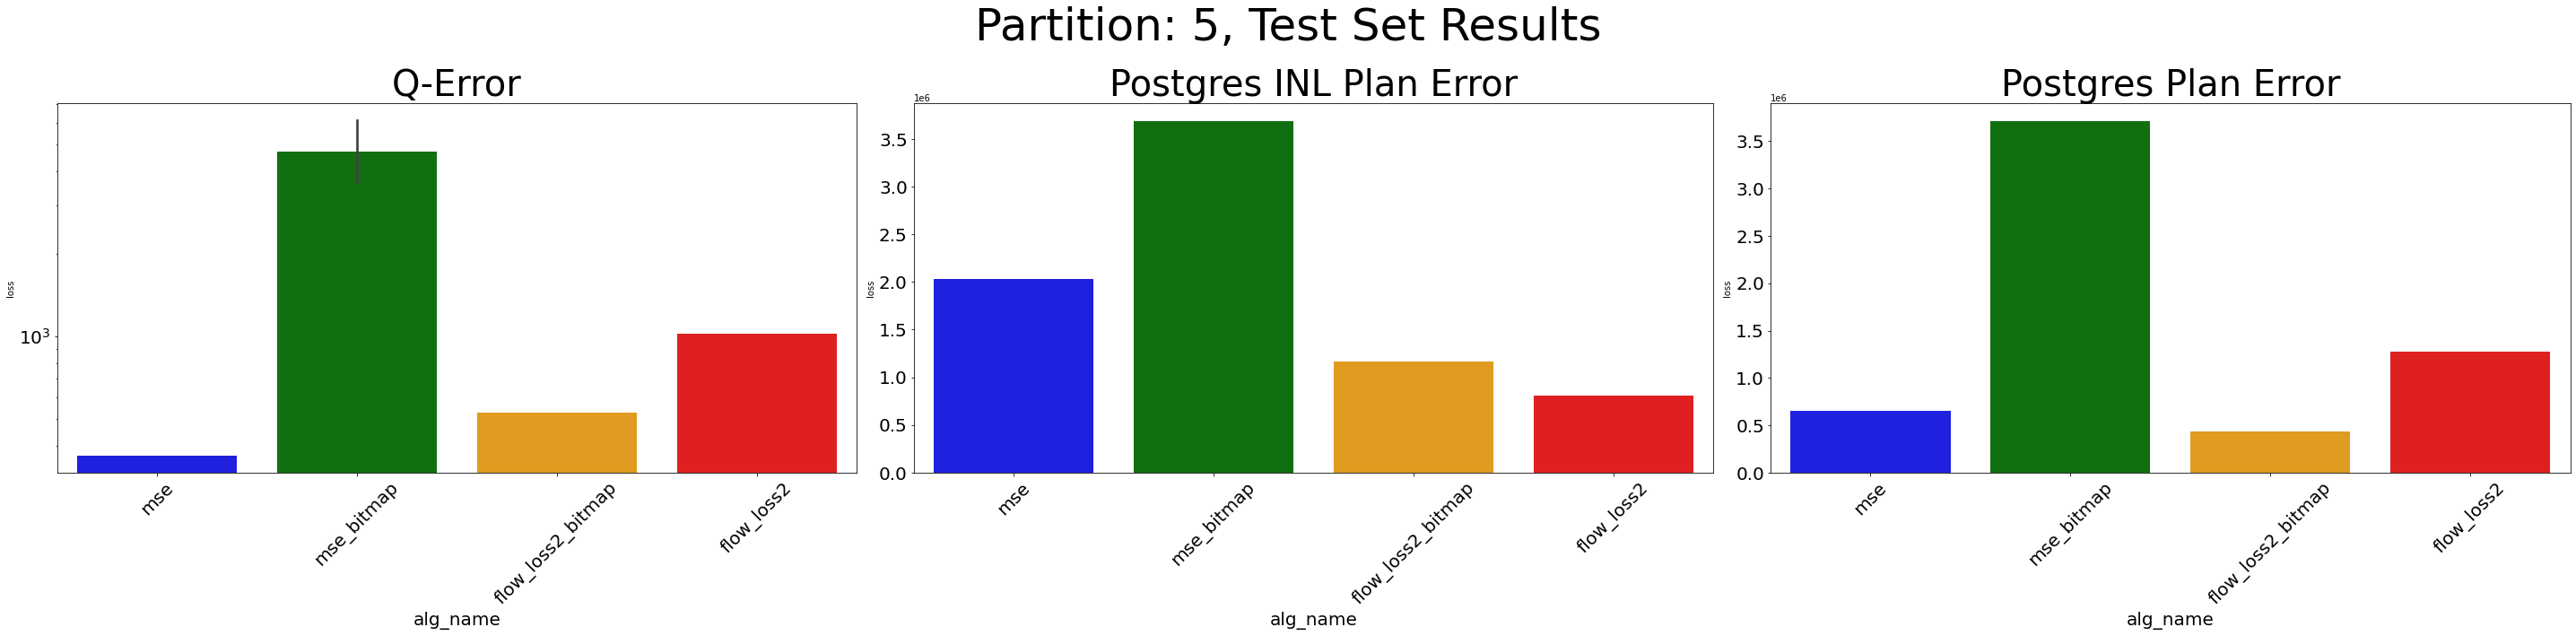

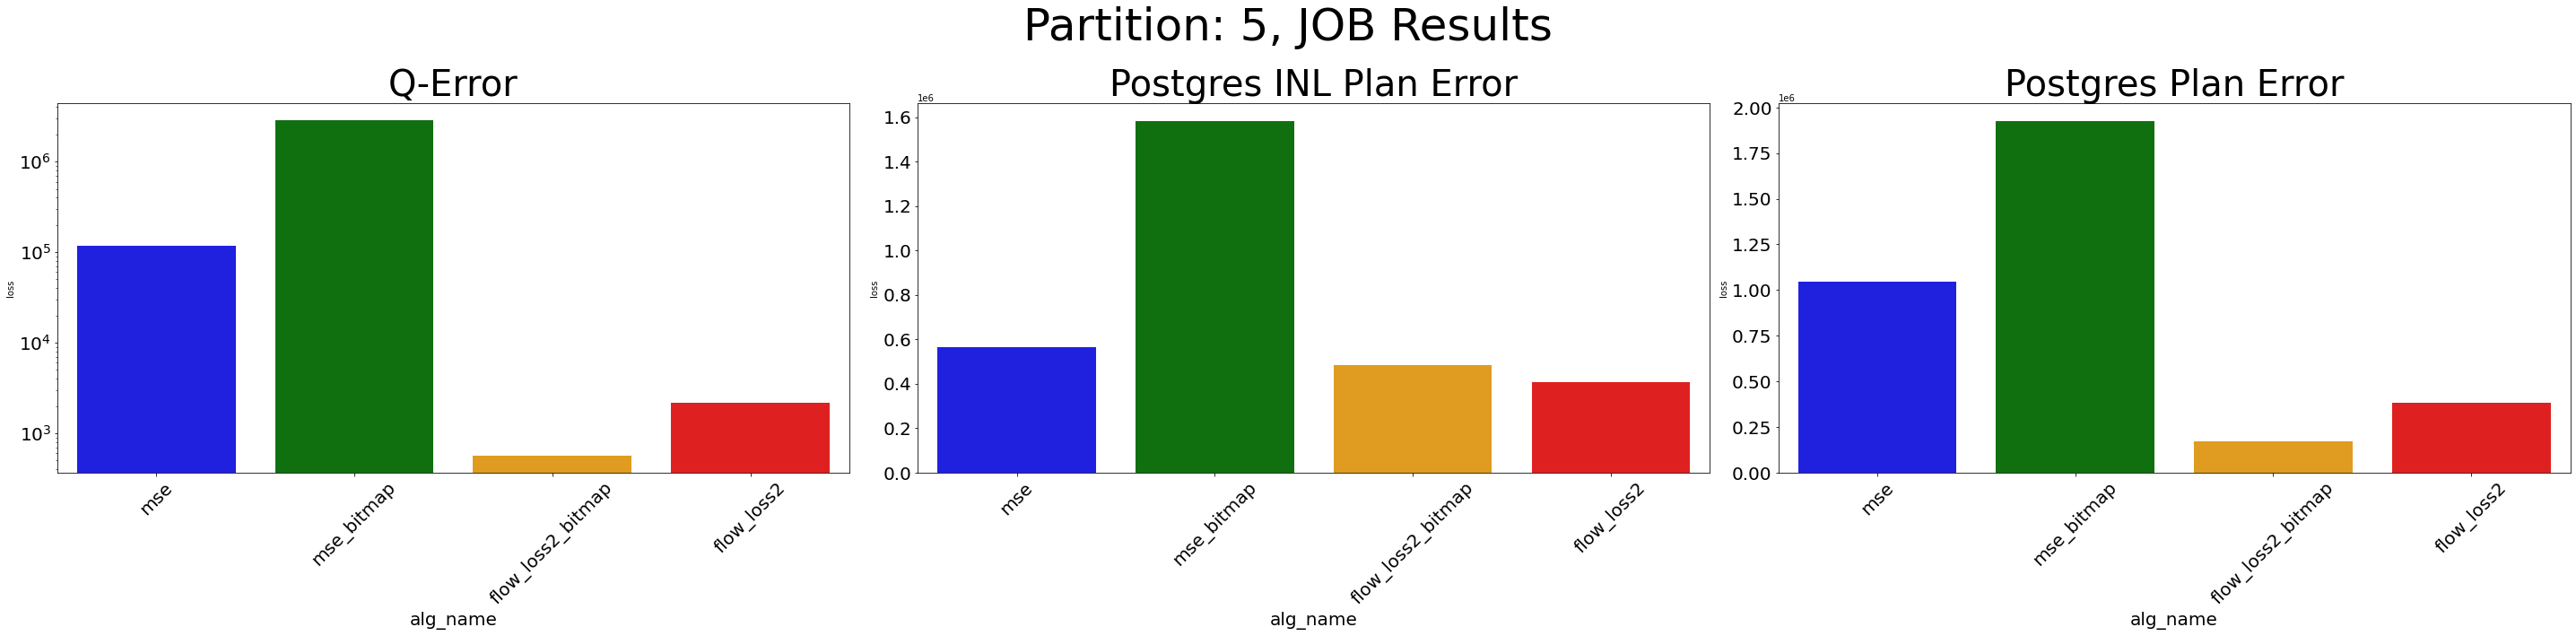

In [230]:
for part in set(df["partition"]):
    pdf = df[df["partition"] == part]
    construct_summary_final(pdf, "train", "Parition: {}, Training Set Results".format(part), 
                            ERRORS, HUE_COLORS=HUE_COLORS, ORDER=ORDER, HUE_ORDER=HUE_ORDER)
    construct_summary_final(pdf, "test", "Partition: {}, Test Set Results".format(part), ERRORS, HUE_COLORS=HUE_COLORS,
                           ORDER=ORDER, HUE_ORDER=HUE_ORDER)
    construct_summary_final(pdf, "job", "Partition: {}, JOB Results".format(part), ERRORS, 
                            HUE_COLORS=HUE_COLORS, ORDER=ORDER, HUE_ORDER=HUE_ORDER)